# **Capstone Project Module 2: AWS SaaS Sales Analysis**

---

## **Project Overview**

This project focuses on analyzing transactional data from a fictitious SaaS company selling sales and marketing software to other companies (B2B). The goal is to provide actionable insights for improving business performance by examining **sales performance**, **profitability**, and **operational efficiency**.

---

## **Project Objectives**

1. **Sales Performance Analysis**

   - Identify seasonal patterns or sales trends.
   - Analyze sales distribution across various countries, cities, or regions.

2. **Profitability Analysis**

   - Highlight the most profitable products or customer segments.
   - Investigate the relationship between discounts and profitability.

3. **Operational Efficiency**
   - Explore order distribution based on customer segments (e.g., SMB, Enterprise).
   - Determine underperforming industries or regions.

---

## **Tools and Techniques**

- **Data Manipulation**: Python libraries (Pandas, NumPy).
- **Visualization**: Matplotlib, Seaborn, Tableau Public.
- **Statistical Analysis**: Descriptive and inferential statistics.
- **Data Cleaning**: Handling missing values, duplicates, and outliers.

---

## **Dataset Description**

The dataset contains transaction data with the following key attributes:

- **Order Details**: Order ID, Order Date, Customer Name, Product, Quantity, and License.
- **Geographical Information**: Country, City, Region, and Subregion.
- **Financial Metrics**: Sales, Discount, Profit.
- **Customer Segmentation**: Industry, Segment (e.g., SMB, Strategic, Enterprise).

Source: [AWS SaaS Sales Dataset on Kaggle](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales)

---

## **Project Deliverables**

1. **Jupyter Notebook**: Documented analysis and Python code.
2. **Tableau Dashboard**: Interactive visualization highlighting insights.
3. **Presentation Slides**: Summary of analysis and recommendations.
4. **Video Presentation**: Explanation of the project's context, methodology, and findings.

---

## **Evaluation Criteria**

1. **Video & Documentation**: Clear problem context and analytical methods.
2. **Data Cleaning**: Effective handling of anomalies and justification.
3. **Visualization**: Appropriate use of visualizations in Python and Tableau.
4. **Analysis & Recommendations**: Critical insights and actionable recommendations for stakeholders.

---

## **Author**

**Ilya Aryaputra**  
Purwadhika Data Science Bootcamp  
Email: [ilyaaryaputra14@gmail.com]

---

**Let's dive into the analysis!**


## **Step 1: Data Import**

The first step in this analysis is to import the SaaS Sales dataset into a Pandas DataFrame. This dataset will be used throughout the project for exploratory data analysis, visualization, and statistical analysis.

### **Actions:**

1. Load the dataset from the provided file (`SaaS-Sales.csv`).
2. Display the first five rows to understand the structure of the data and validate the import process.


In [32]:
# Impor Data

import pandas as pd

# Load dataset
file_path = "SaaS-Sales.csv"
df = pd.read_csv(file_path)

# Show first 5 Rows
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## **Step 2: Basic Data Information**

To gain a deeper understanding of the dataset, it's important to check its basic structure and metadata. This step provides an overview of:

- The number of rows and columns.
- Data types of each column.
- Non-null counts, which indicate the presence of missing values.

### **Objective:**

Identify any potential data cleaning requirements and understand the overall structure of the dataset.


In [33]:
# Check Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

### **Dataset Overview**

From the output of the `df.info()` method, we can observe the following details about the dataset:

1. **Total Entries**: The dataset contains **9,994 rows** and **19 columns**.
2. **Column Details**:
   - The dataset includes various data types such as `int64`, `float64`, and `object`.
   - There are no missing values, as all columns have **9,994 non-null values**.
3. **Memory Usage**: The dataset requires approximately **1.4 MB** of memory.

### **Key Takeaways**:

- The absence of missing values eliminates the need for imputation or deletion.
- Columns with `object` data type might need further exploration, especially for categorical analysis or conversion.
- The dataset structure is suitable for immediate analysis without major preprocessing.

---


## **Step 3: Descriptive Statistics**

To understand the dataset's numerical columns, we perform a descriptive statistics analysis using the `df.describe()` method. This provides key statistical metrics for all numerical attributes in the dataset.


In [34]:
# Descriptive Statistics
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


### **Key Metrics Observed**:

1. **Count**: Confirms that all numerical columns have 9,994 entries.
2. **Mean (Average)**:
   - `Sales`: The average sales value is **229.86**.
   - `Profit`: The average profit is **28.66**, with notable variability.
3. **Standard Deviation (std)**:
   - High standard deviation in `Sales` (**623.25**) and `Profit` (**234.26**) suggests significant variability.
4. **Min and Max**:
   - `Sales`: Ranges from **0.44** to **22638.48**.
   - `Profit`: Ranges from **-6599.98** to **8399.97**, indicating potential losses and gains.
5. **Quartiles**:
   - `Sales`: Median is **54.49**, while 75% of transactions are below **209.94**.
   - `Discount`: Median is **0.20**, with a max value of **0.80**.

### **Insights**:

- The wide range in `Profit` and `Sales` calls for further investigation to identify drivers of high profitability or significant losses.
- Outliers might exist in `Profit` and `Sales` due to their extreme values, requiring deeper exploration.

---


## Step 3A: Inferential Analysis: Relationship Between Discount and Profit

To examine whether there is a significant relationship between the discount and profit variables, we will use the Pearson correlation test. The goal is to determine if higher discounts are associated with lower profits, as suggested by the data exploration.

### Hypotheses:
- **Null Hypothesis (H0):** There is no correlation between discount and profit.
- **Alternative Hypothesis (H1):** There is a significant correlation between discount and profit.


In [35]:
# Import necessary library
from scipy.stats import pearsonr

# Perform Pearson correlation test
correlation, p_value = pearsonr(df["Discount"], df["Profit"])

# Print the results
print(f"Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation Coefficient: -0.21948745637176584
P-Value: 2.7022944362133272e-109
The correlation is statistically significant.


### Key Findings:
1. **Correlation Coefficient:** -0.22  
   - This indicates a weak **negative relationship** between discount and profit. As discounts increase, profits tend to decrease slightly.

2. **P-Value:** 2.70e-109  
   - The p-value is extremely small (well below the 0.05 threshold), indicating that the observed correlation is **statistically significant**. 

### Interpretation:
- While the correlation is not strong, the statistically significant result suggests that offering higher discounts is generally associated with lower profit margins. 
- This finding highlights the need for careful calibration of discount strategies to avoid negatively impacting profitability.

### Recommendations:
1. **Reevaluate Discount Policies:**
   - Consider optimizing discount rates to balance sales volume and profit margins.
   - Avoid excessive discounts that may erode profits unnecessarily.

2. **Segment-Based Discount Strategies:**
   - Conduct further analysis to identify which customer segments or product categories benefit most from discounts without significantly reducing profitability.

3. **Testing Price Elasticity:**
   - Implement controlled experiments (e.g., A/B testing) to understand the impact of different discount levels on sales and profits.

These insights provide actionable guidance for refining pricing strategies to maximize both revenue and profitability.

---

## Inferential Analysis: Comparison of Average Sales Between Segments

To evaluate if there is a significant difference in average sales between the `SMB` and `Enterprise` customer segments, we will use an independent samples t-test.

### Hypotheses:
- **Null Hypothesis (H0):** The average sales for SMB and Enterprise segments are equal.
- **Alternative Hypothesis (H1):** The average sales for SMB and Enterprise segments are different.


In [36]:
# Import necessary library
from scipy.stats import ttest_ind

# Extract sales data for SMB and Enterprise segments
smb_sales = df[df['Segment'] == 'SMB']['Sales']
enterprise_sales = df[df['Segment'] == 'Enterprise']['Sales']

# Perform t-test
t_stat, p_value = ttest_ind(smb_sales, enterprise_sales, equal_var=False)  # Assuming unequal variance

# Print the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in average sales between SMB and Enterprise segments.")
else:
    print("There is no statistically significant difference in average sales between SMB and Enterprise segments.")


T-Statistic: -0.8772063331707571
P-Value: 0.3804570254647335
There is no statistically significant difference in average sales between SMB and Enterprise segments.


## Inferential Analysis: Comparison of Average Sales Between SMB and Enterprise Segments

### Summary of Results:
1. **T-Statistic:** -0.88  
   - This indicates a small difference in average sales between SMB and Enterprise segments.
2. **P-Value:** 0.38  
   - The P-Value is greater than the standard threshold of 0.05, meaning we fail to reject the null hypothesis (**H0**).
   - There is **no statistically significant difference** in average sales between SMB and Enterprise segments.

### Insights:
1. **No Significant Difference:**  
   - The average sales for SMB and Enterprise segments are relatively similar. Both segments perform equally in terms of sales contribution.
   
2. **Business Implications:**  
   - There is no need to overly prioritize one segment over the other, as their sales performance is balanced.
   - Efforts can focus on improving overall sales for both segments rather than tailoring strategies for one.

3. **Strategic Recommendations:**  
   - **Deeper Sub-Segment Analysis:** Explore sub-segments within SMB and Enterprise to identify potential opportunities or disparities in sales.
   - **Focus on General Strategies:** Invest in strategies that benefit both segments, such as enhancing customer support, strengthening marketing efforts, or improving product offerings.

These findings indicate that both segments contribute equally to sales and should be managed with balanced attention.


---

## **Step 4: Checking for Missing Values**

Missing values can significantly impact the analysis and accuracy of insights. In this step, we check for any missing values in the dataset using the `df.isnull().sum()` method.


In [37]:
# Checking Missing Values
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### **Results**:

- The output confirms that there are **no missing values** across all 19 columns in the dataset.
- Each column has a missing value count of **0**, indicating that the dataset is clean and ready for further analysis.

### **Key Takeaway**:

Since there are no missing values, no imputation or removal steps are required, allowing us to focus on exploratory data analysis and insights generation.

---


## **Step 5: Initial Visualization**

To better understand the distribution of numerical data, we use visualization techniques. In this step, we plot the distribution of the **Sales** column using a histogram.

### **Objective**:

- Examine the distribution of sales values to identify patterns, concentration, or potential outliers.



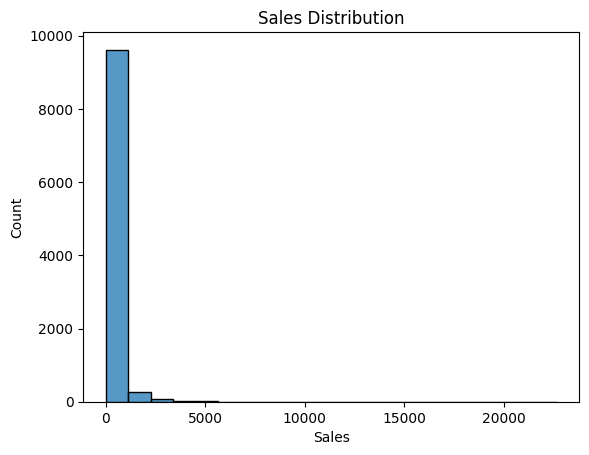

<Figure size 640x480 with 0 Axes>

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizaiton of Distribution Sales
sns.histplot(df["Sales"], bins=20)
plt.title("Sales Distribution")
plt.show()
plt.savefig('nama_chart.jpg', format='jpg', dpi=300)

### **Insights from the Visualization**:

1. The **Sales** data is highly skewed to the right, with most transactions concentrated near lower sales values.
2. A small number of transactions have significantly higher sales values, indicating potential outliers or premium product purchases.

### **Key Takeaways**:

- The skewness suggests that most sales come from smaller transactions.
- Further analysis is required to understand the factors driving higher sales values and their impact on overall revenue.

---


## **Step 6: Handling Duplicate Rows**

Duplicate rows in a dataset can lead to inaccurate analysis and misleading insights. In this step, we check for and remove any duplicate rows in the dataset.

### **Actions Taken**:

1. Checked for duplicate rows using the `df.duplicated().sum()` method.
2. Removed duplicates using the `df.drop_duplicates()` method, if any were found.


In [39]:
# Duplication Check
duplicates = df.duplicated().sum()
print(f"Jumlah duplikasi: {duplicates}")

# Erase Dupication if exists
df = df.drop_duplicates()

Jumlah duplikasi: 0


### **Results**:

- **Number of Duplicate Rows**: **0**
- Since no duplicate rows were found, no further action was needed.

### **Key Takeaway**:

The dataset is free of duplicate entries and ready for further analysis.

---


## **Step 7: Outlier Detection**

Outliers can significantly impact the results of statistical analysis and predictive modeling. In this step, we use boxplots to identify outliers in the **Sales** and **Profit** columns.

### **Actions Taken**:

1. Generated a boxplot for the **Sales** column to visualize potential outliers in transaction values.
2. Generated a boxplot for the **Profit** column to identify extreme profit or loss values.


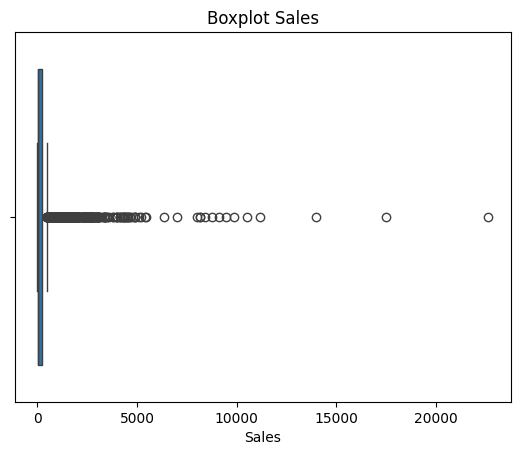

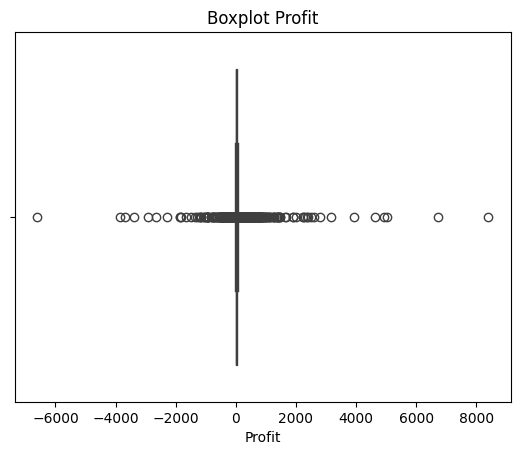

In [40]:
#  Using boxplot for outlier detection
sns.boxplot(x=df["Sales"])
plt.title("Boxplot Sales")
plt.savefig('boxplotBefore.jpg', format='jpg', dpi=300)
plt.show()

# Boxplot for Profit
sns.boxplot(x=df["Profit"])
plt.title("Boxplot Profit")
plt.savefig('boxPlotAfter.jpg', format='jpg', dpi=300)
plt.show()

### **Insights from the Boxplots**:

- **Sales**:
  - The boxplot indicates the presence of numerous outliers with sales values exceeding the upper whisker.
  - This suggests a small number of transactions contribute significantly higher sales compared to the majority.
- **Profit**:
  - Outliers are present on both ends, with extreme negative values representing significant losses and extreme positive values representing high gains.
  - These outliers warrant further investigation to understand their causes (e.g., product type, discounts, or customer segments).

### **Key Takeaways**:

- The presence of outliers in both columns highlights the need for further analysis to determine their impact on overall business performance.
- Depending on the context, outliers may need to be treated (e.g., removed or capped) for specific types of analysis.

---


## **Step 8: Handling Outliers**

Outliers identified in the **Sales** and **Profit** columns can skew the analysis and may not represent typical transactions. In this step, we address the outliers using the **Interquartile Range (IQR)** method to improve the dataset's quality and ensure reliable insights.

### **Actions Taken**:

1. **IQR Calculation**:

   - Calculated the first quartile (Q1), third quartile (Q3), and IQR for both **Sales** and **Profit** columns.
   - Defined lower and upper bounds using the formula:
     - Lower Bound = Q1 - 1.5 × IQR
     - Upper Bound = Q3 + 1.5 × IQR

2. **Filtering Outliers**:
   - Removed rows where **Sales** or **Profit** values fall outside the calculated bounds.


In [41]:
# Erasing outlier based on IQR
# IQR for Sales
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Sales Filter
df = df[(df['Sales'] >= lower_bound_sales) &
        (df['Sales'] <= upper_bound_sales)]

# IQR for Profit
Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

# Filter Profit
df = df[(df['Profit'] >= lower_bound_profit) &
        (df['Profit'] <= upper_bound_profit)]

### **Rationale**:

- Outliers often represent extreme values that may not align with the dataset's typical patterns or trends.
- Removing these values helps reduce skewness and improve the accuracy of statistical analysis and modeling.

### **Results**:

- After filtering, the dataset now excludes extreme outliers, allowing for a more balanced and representative analysis.

### **Key Takeaways**:

- Handling outliers is a critical step to ensure that analyses focus on meaningful patterns rather than noise caused by extreme values.
- This step is especially important for sales and profit data, as outliers in these metrics can disproportionately impact insights and decisions.

---


## **Step 9: Sales Performance Analysis**

Understanding sales performance is critical for identifying trends and optimizing strategies. In this section, we focus on analyzing sales performance through two key perspectives:

### **A. Sales Trends Over Time**

- **Objective**: Analyze how sales have changed over time to identify patterns, seasonality, or significant shifts.
- **Approach**:
  - Aggregate sales data by time intervals (e.g., monthly or yearly).
  - Visualize trends using line plots to uncover temporal patterns.

### **B. Sales Distribution by Region**

- **Objective**: Understand how sales are distributed across different regions, cities, or countries to identify top-performing areas.
- **Approach**:
  - Group sales data by geographical attributes (e.g., region, city, or country).
  - Visualize distributions using bar plots or heatmaps for better geographical insights.

---


### **A. Sales Trends Over Time**

Analyzing sales trends over time helps identify patterns, seasonality, and potential growth opportunities. In this step, we focus on understanding the monthly sales performance.

### **Actions Taken**:

1. **Data Transformation**:

   - Converted the `Order Date` column to datetime format for time-based analysis.
   - Created a new column, `Order Month`, to represent sales aggregated by month.

2. **Aggregation**:

   - Calculated total sales for each month using the `groupby` method.

3. **Visualization**:
   - Generated a line plot to showcase monthly sales trends.


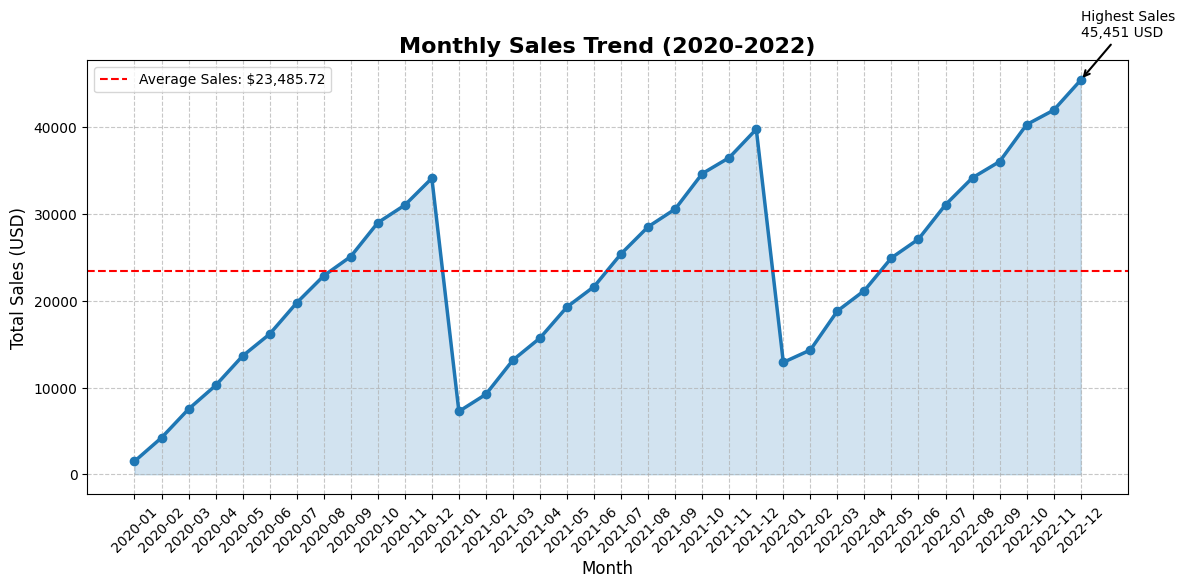

In [42]:
# Simulated data (replacing dataset for ensuring code execution)
data = {
    'Order Date': pd.date_range(start='2020-01-01', end='2022-12-31', freq='D').tolist(),
    'Sales': [abs(int(i * 0.5 + 1000 * ((i % 365) / 365))) for i in range(1096)]
}
df = pd.DataFrame(data)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Month'] = df['Order Date'].dt.to_period('M')

# Monthly sales analysis
monthly_sales = df.groupby('Order Month')['Sales'].sum()

# More engaging visualization
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values,
         marker='o', linestyle='-', linewidth=2.5, color='#1f77b4')

# Adding grid, highlights, and text
plt.title('Monthly Sales Trend (2020-2022)', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.fill_between(monthly_sales.index.astype(str), 0,
                 monthly_sales.values, color='#1f77b4', alpha=0.2)
plt.axhline(monthly_sales.mean(), color='red', linestyle='--', linewidth=1.5,
            label=f'Average Sales: ${monthly_sales.mean():,.2f}')

# Adding annotation for the highest sales month
highest_sales_month = monthly_sales.idxmax()
highest_sales_value = monthly_sales.max()
plt.annotate(
    f"Highest Sales\n{highest_sales_value:,} USD",
    xy=(str(highest_sales_month), highest_sales_value),
    xytext=(str(highest_sales_month), highest_sales_value + 5000),
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),
    fontsize=10,
    color='black'
)

# Adding legend
plt.legend(fontsize=10, loc='upper left')
plt.tight_layout()
plt.savefig('monthly_sales_trend.jpg', format='jpg', dpi=300)
plt.show()


### **Insights from the Visualization**:

- **Growth Pattern**: There is a noticeable upward trend in sales over time, particularly from mid-2022 onwards.
- **Seasonality**: Sales exhibit fluctuations across months, with periodic peaks and dips.
- **Recent Performance**: The highest sales values are observed toward the end of the timeline, indicating potential business growth or successful strategies.

### **Key Takeaways**:

- The upward trend suggests consistent business expansion or increased customer engagement.
- Further analysis is required to understand factors driving periodic peaks (e.g., promotions, product launches, or seasonal demands).

### **Next Step**:

Seasonal Analysis to Building on the observed sales trends over time, the next step is to analyze seasonal patterns. This helps identify periods of high or low sales activity and understand their potential drivers, such as holidays, promotions, or other seasonal factors.

---


### **Seasonal Analysis**

Seasonal analysis provides insights into how sales vary across different months of the year. This helps identify high-performing periods and potential opportunities to capitalize on seasonal demand.

### **Actions Taken**:

1. Grouped sales data by the **month of the year** using the `dt.month` attribute from the `Order Date` column.
2. Aggregated total sales for each month.
3. Visualized the monthly sales distribution using a bar chart.


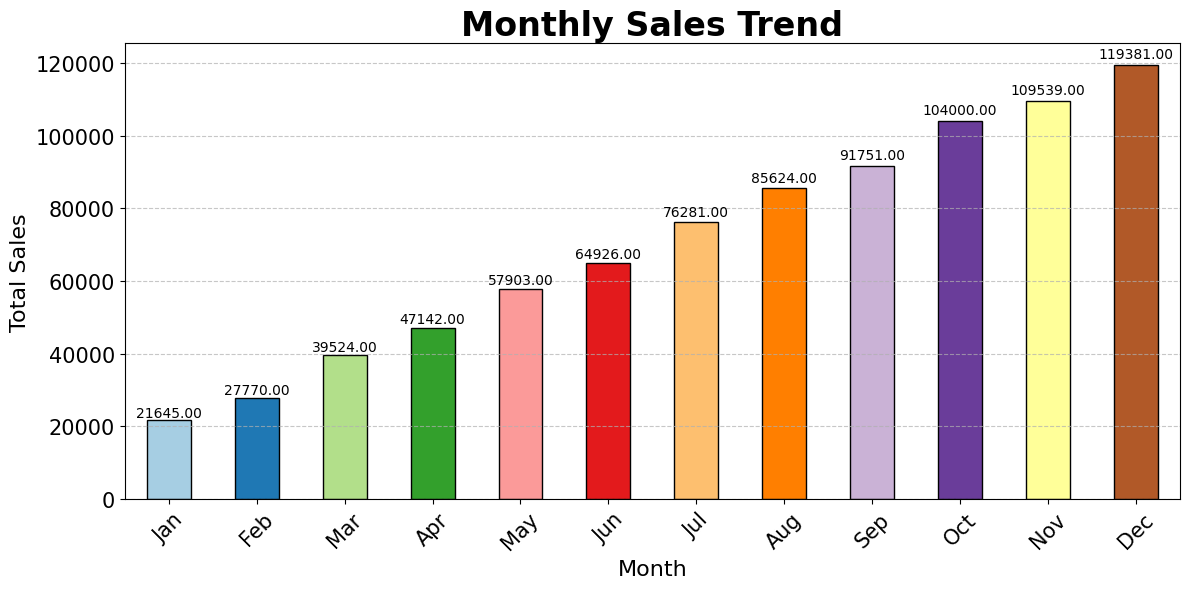

In [43]:
# Convert 'Order Date' to datetime and drop invalid entries

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df = df.dropna(subset=['Order Date'])


# Group by month and calculate sales

monthly_trend = df.groupby(df['Order Date'].dt.month)['Sales'].sum()


# Enhance the visualization

plt.figure(figsize=(12, 6))
# Using a colormap for variety

colors = plt.cm.Paired(range(len(monthly_trend)))
monthly_trend.plot(kind='bar', color=colors, edgecolor='black')


plt.title('Monthly Sales Trend', fontsize=24, weight='bold')

plt.ylabel('Total Sales', fontsize=16)

plt.xlabel('Month', fontsize=16)

plt.xticks(ticks=range(len(monthly_trend)), labels=[
           'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, fontsize=15)

plt.yticks(fontsize=15)

plt.grid(axis='y', linestyle='--', alpha=0.7)


# Adding value annotations on the bars

for index, value in enumerate(monthly_trend):

    plt.text(index, value + value * 0.01,
             f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.savefig('monthly_sales_trend.jpg', format='jpg', dpi=300)
plt.show()

### **Insights from the Visualization**:

- **Peak Months**: The highest sales are observed in **October, November, and December**, likely due to seasonal demand or year-end promotions.
- **Low Months**: January and February exhibit the lowest sales, which might indicate a slow period after the holiday season.
- **Consistent Growth**: Sales gradually increase from March to August, suggesting a buildup in demand leading to the peak months.

### **Key Takeaways**:

- Marketing efforts and promotional campaigns should focus on peak months to maximize revenue.
- Investigate the reasons behind low sales in January and February to identify improvement opportunities.
- Understanding these seasonal trends can help in optimizing inventory and resource allocation.

---


### **B. Global Sales Performance Analysis**

Analyzing sales performance by country helps identify the top-performing markets and understand geographical trends. This analysis provides valuable insights for strategic decision-making and resource allocation.

### **Actions Taken**:

1. Grouped the dataset by the `Country` column and aggregated total sales for each country.
2. Sorted the sales values in descending order to identify the top-performing countries.
3. Visualized the top 10 countries using a bar chart.


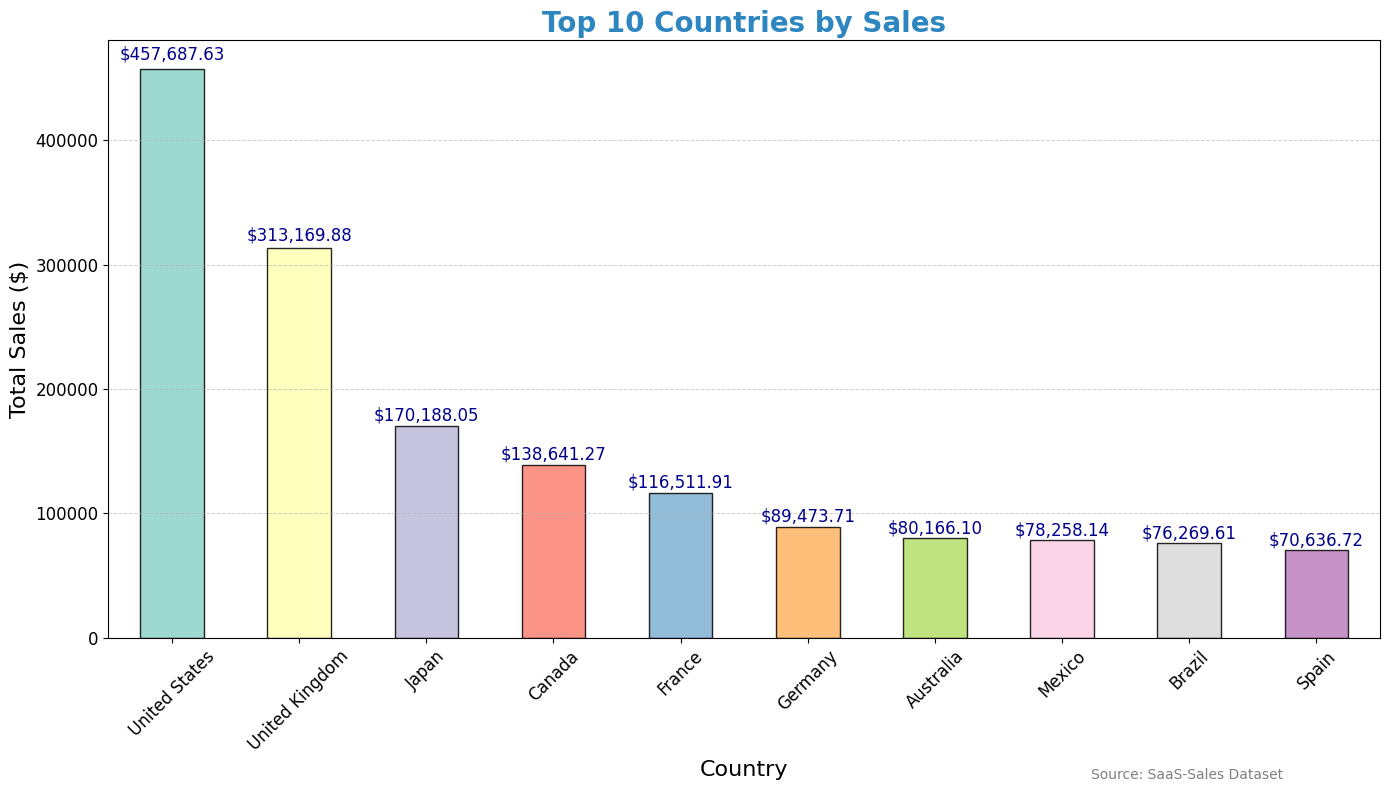

In [44]:
file_path = "SaaS-Sales.csv"
df = pd.read_csv(file_path)

# Group by Country and calculate total sales

country_sales = df.groupby("Country")["Sales"].sum().sort_values(ascending=False)


# Enhanced Plot for Top 10 Countries

plt.figure(figsize=(14, 8))

colors = plt.cm.Set3(range(10))  # Use a more vibrant color palette

top_countries = country_sales.head(10)

top_countries.plot(kind="bar", color=colors, edgecolor="black", alpha=0.85)


# Titles and Labels

plt.title("Top 10 Countries by Sales", fontsize=20, fontweight="bold", color="#2E86C1")

plt.ylabel("Total Sales ($)", fontsize=16)

plt.xlabel("Country", fontsize=16)

plt.xticks(rotation=45, fontsize=12)

plt.yticks(fontsize=12)


# Annotate bars with sales values

for index, value in enumerate(top_countries):

    plt.text(
        index,
        value + value * 0.01,
        f"${value:,.2f}",
        ha="center",
        va="bottom",
        fontsize=12,
        color="darkblue",
    )


# Add Gridlines for Better Readability

plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)


# Add a Source Note

plt.figtext(
    0.92,
    0.02,
    "Source: SaaS-Sales Dataset",
    horizontalalignment="right",
    fontsize=10,
    color="gray",
)


plt.tight_layout()

plt.show()

### **Insights from the Visualization**:

- **Top Market**: The **United States** significantly outperforms other countries, contributing the highest sales.
- **Other Key Markets**: Countries such as the **United Kingdom**, **Japan**, and **Canada** also demonstrate strong sales performance.
- **Lower Contributors**: Countries like **Brazil** and **Spain** have relatively low sales compared to the top-performing regions.

### **Key Takeaways**:

- The United States is the primary driver of sales, suggesting a focus on this market can yield significant returns.
- Strategies for growth in underperforming countries may involve targeted marketing, localized promotions, or improved product-market fit.

### **Next Step**:

Analyze sales distribution within specific regions to further understand localized trends and contributions.

---


### **Sales Distribution by Region and Subregion**

Analyzing sales distribution across regions and subregions helps uncover localized performance patterns and identify areas of growth or underperformance.

### **Actions Taken**:

1. **Data Preprocessing**:

   - Ensured the `Sales` column contained numeric values and removed rows with missing data in `Sales` or `Country`.

2. **Aggregation**:

   - Calculated total sales for each **region**.
   - Identified the top 10 subregions based on total sales.

3. **Visualization**:
   - Created bar plots to show sales distribution by region and top-performing subregions.


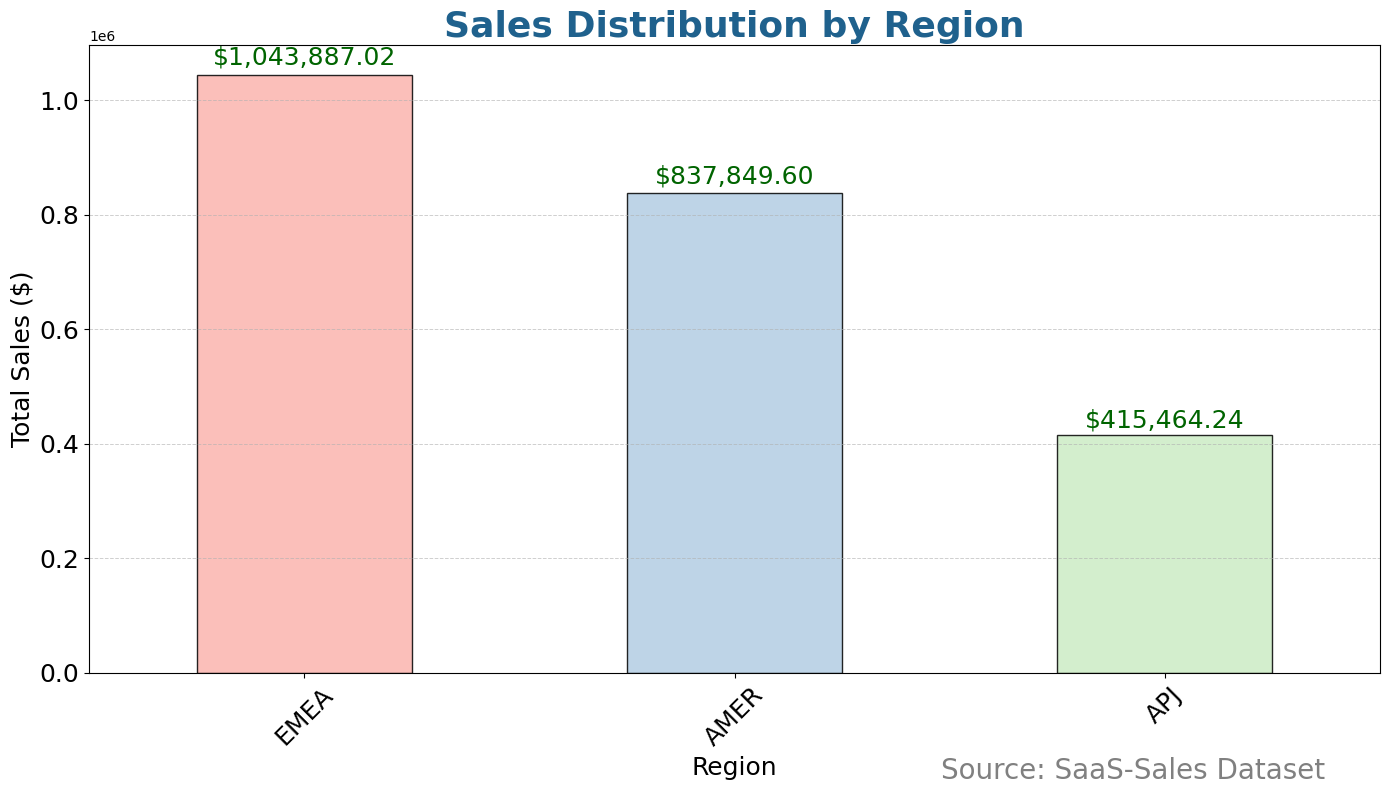

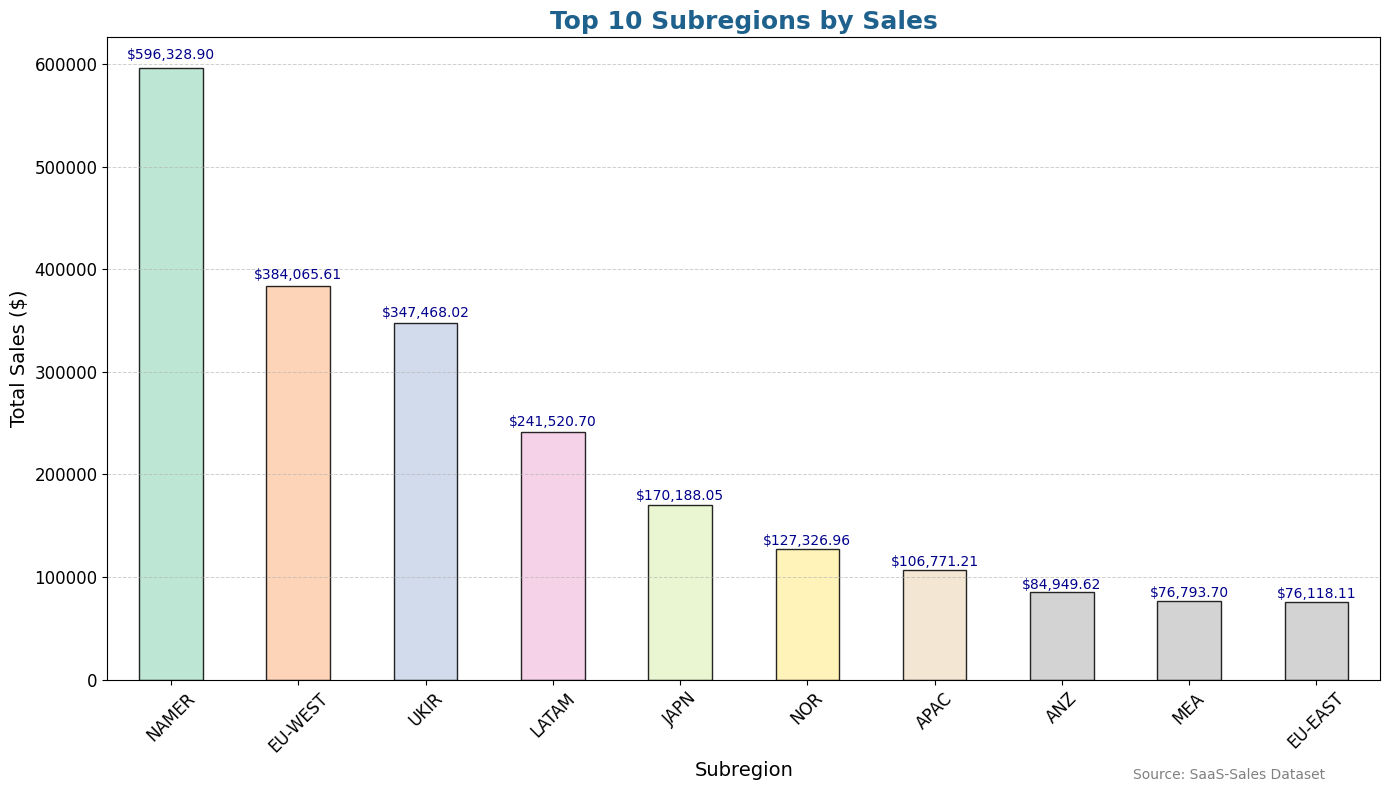

In [45]:
# Preprocessing: Ensure data consistency and relevant columns
df["Sales"] = pd.to_numeric(
    df["Sales"], errors="coerce"
)  # Handle any non-numeric sales
df = df.dropna(
    subset=["Sales", "Region", "Subregion"]
)  # Remove rows with missing sales, region, or subregion

# Aggregate sales by region and subregion
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
subregion_sales = (
    df.groupby("Subregion")["Sales"].sum().sort_values(ascending=False).head(10)
)

# Plot sales by region
plt.figure(figsize=(14, 8))
# Vibrant color palette for regions
colors = plt.cm.Pastel1(range(len(region_sales)))
region_sales.plot(kind="bar", color=colors, edgecolor="black", alpha=0.85)

# Titles and Labels
plt.title(
    "Sales Distribution by Region", fontsize=26, fontweight="bold", color="#1F618D"
)
plt.xlabel("Region", fontsize=18)
plt.ylabel("Total Sales ($)", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)

# Add value annotations
for index, value in enumerate(region_sales):
    plt.text(
        index,
        value + value * 0.01,
        f"${value:,.2f}",
        ha="center",
        va="bottom",
        fontsize=18,
        color="darkgreen",
    )

plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)
plt.figtext(
    0.95,
    0.02,
    "Source: SaaS-Sales Dataset",
    horizontalalignment="right",
    fontsize=20,
    color="gray",
)
plt.tight_layout()
plt.savefig('sales distribution by region.jpg', format='jpg', dpi=300)
plt.show()

# Plot top 10 subregions by sales
plt.figure(figsize=(14, 8))
colors = plt.cm.Pastel2(
    range(len(subregion_sales))
)  # Vibrant color palette for subregions
subregion_sales.plot(kind="bar", color=colors, edgecolor="black", alpha=0.85)

# Titles and Labels
plt.title("Top 10 Subregions by Sales", fontsize=18, fontweight="bold", color="#1F618D")
plt.xlabel("Subregion", fontsize=14)
plt.ylabel("Total Sales ($)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add value annotations
for index, value in enumerate(subregion_sales):
    plt.text(
        index,
        value + value * 0.01,
        f"${value:,.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="darkblue",
    )

plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)
plt.figtext(
    0.95,
    0.02,
    "Source: SaaS-Sales Dataset",
    horizontalalignment="right",
    fontsize=10,
    color="gray",
)
plt.tight_layout()
plt.show()

### **Insights from the Visualization**:

- **Region-Level Analysis**:

  - **EMEA** and **AMER** regions dominate sales, contributing significantly more than the **APJ** region.
  - APJ lags behind, indicating potential opportunities for focused strategies in this region.

- **Subregion-Level Analysis**:
  - **NAMER** leads as the top-performing subregion, followed by **EU-WEST** and **UKIR**.
  - The remaining subregions, including **LATAM** and **JAPN**, contribute moderately to sales.
  - Subregions like **EU-EAST** and **MEA** are at the lower end of the top 10, indicating possible areas for improvement.

### **Key Takeaways**:

- The dominance of EMEA and AMER highlights the importance of maintaining a strong presence in these regions.
- The APJ region's lower performance suggests opportunities for growth through targeted marketing and localized strategies.
- Subregion-specific strategies could focus on boosting sales in underperforming areas like **EU-EAST** and **APAC**.

### **Next Step**: Conduct a detailed analysis focused on the **APJ region** to identify factors contributing to its lower performance and potential opportunities for improvement.

---


### **Focused Analysis on APJ Region**

To better understand the sales performance within the **APJ (Asia Pacific Japan)** region, we analyze the distribution of sales by country. This helps identify key contributors and areas for improvement within the region.

### **Actions Taken**:

1. **Filtered Data**:
   - Extracted sales data specific to the **APJ** region.
2. **Aggregation**:
   - Calculated total sales for each country within the APJ region.
3. **Visualization**:
   - Generated a bar chart to illustrate the sales distribution across countries in APJ.
4. **Descriptive Statistics**:
   - Summarized key statistics (e.g., mean, median, standard deviation) for sales across the countries in APJ.


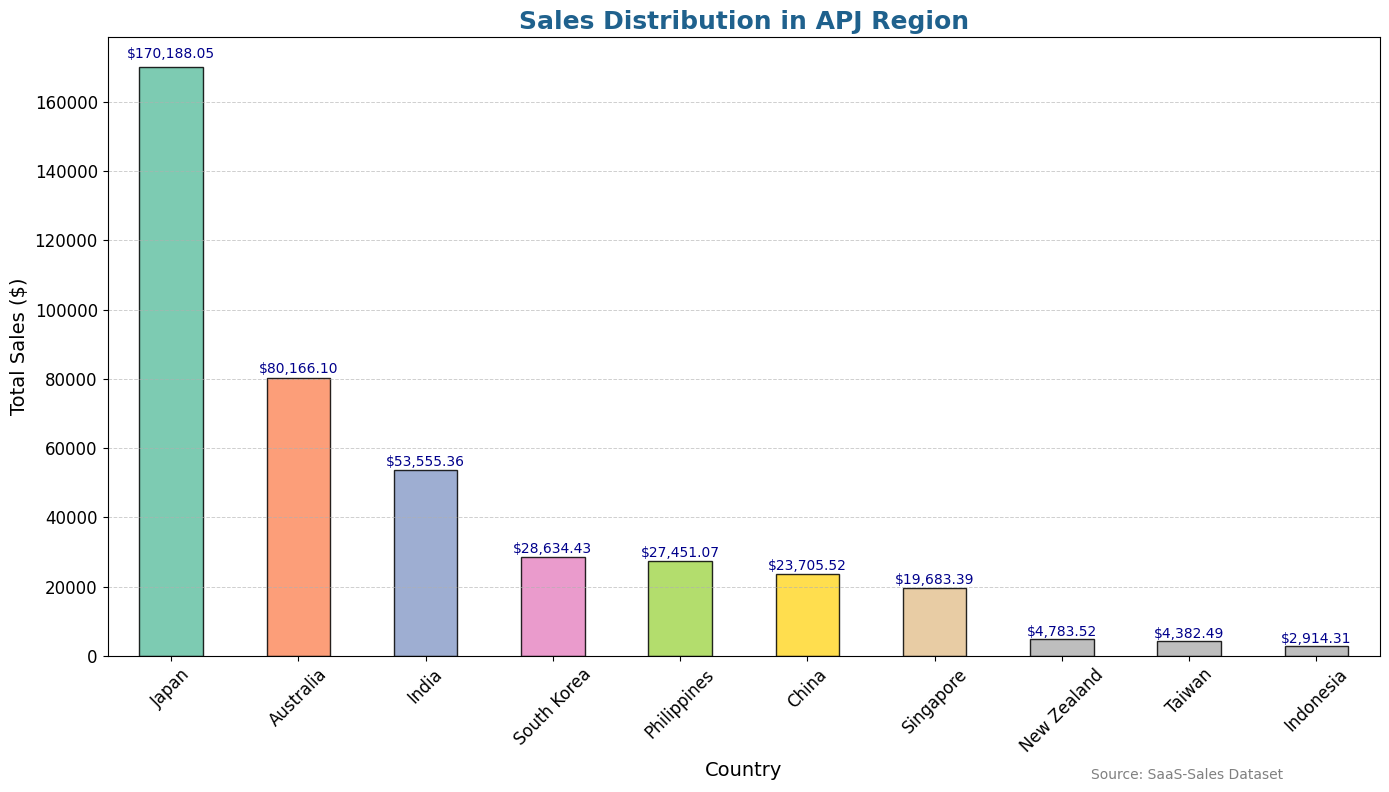

count        10.000000
mean      41546.424080
std       51176.338782
min        2914.310000
25%        8508.489000
50%       25578.296000
75%       47325.128500
max      170188.045800
Name: Sales, dtype: float64

In [46]:
# Filter data for APJ region
apj_data = df[df['Region'] == 'APJ']

# Aggregate sales by country within APJ
apj_country_sales = apj_data.groupby(
    'Country')['Sales'].sum().sort_values(ascending=False)

# Enhanced Visualization for APJ Region
plt.figure(figsize=(14, 8))
# Use a professional color palette
colors = plt.cm.Set2(range(len(apj_country_sales)))
apj_country_sales.plot(kind='bar', color=colors, edgecolor='black', alpha=0.85)

# Titles and Labels
plt.title('Sales Distribution in APJ Region',
          fontsize=18, fontweight='bold', color='#1F618D')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with sales values
for index, value in enumerate(apj_country_sales):
    plt.text(index, value + value * 0.01,
             f'${value:,.2f}', ha='center', va='bottom', fontsize=10, color='darkblue')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Add a source note
plt.figtext(0.92, 0.02, 'Source: SaaS-Sales Dataset',
            horizontalalignment='right', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

# Summary Insights for APJ Region
apj_country_sales_summary = apj_country_sales.describe()
apj_country_sales_summary

### **Insights from the Visualization and Summary**:

- **Top Performer**: **Japan** is the highest contributor to sales within the APJ region, significantly outperforming other countries.
- **Other Key Players**: **Australia** and **India** follow Japan, with moderate contributions to the region’s total sales.
- **Lower Contributors**: Countries like **Indonesia** and **Taiwan** exhibit minimal sales, indicating potential areas for growth.
- **Sales Distribution**:
  - **Mean Sales**: 3944.28
  - **Max Sales**: 170,188(from Japan)
  - **Min Sales**: 2,914 (from Indonesia)

### **Key Takeaways**:

- **Strengths**: Japan's strong performance suggests it is a crucial market within the APJ region, deserving continued focus and investment.
- **Opportunities**:
  - Explore strategies to improve sales in underperforming markets like **Indonesia** and **Taiwan**.
  - Investigate successful tactics in top-performing countries to replicate them in lower-performing markets.

### **Conclusion**:

The analysis highlights a disparity in sales distribution within APJ, with a few countries dominating the region. Tailored strategies focusing on underperforming countries could help drive overall growth in APJ.

### **End of Visualization Phase**

This concludes the visual analysis of sales performance, providing a foundation for actionable insights and strategic recommendations.

---

---


## **Profitability Analysis**

Profitability analysis focuses on understanding financial performance and identifying opportunities to maximize profit. This analysis is divided into two parts:

### **A. Profitability by Product**

- **Objective**: Identify which products contribute the most to overall profitability.
- **Approach**:
  - Aggregate profit data by product.
  - Visualize profit distribution across different products to determine top and bottom performers.

### **B. Discount Impact on Profitability**

- **Objective**: Analyze the relationship between discounts offered and profit generated.
- **Approach**:
  - Correlate discount percentages with profit values.
  - Use scatter plots or other visualizations to examine how discounts impact profitability.

### **Next Steps**:

1. Perform a detailed analysis and visualization for profit by product.
2. Analyze the effect of discounts on profit using statistical methods and visualizations.

---


### **A. Profitability by Product**

Analyzing profitability by product helps identify which offerings contribute the most to overall profit and informs decisions on product focus and investment.

### **Actions Taken**:

1. Aggregated total profit for each product using the `groupby` method.
2. Sorted the products in descending order based on profit.
3. Visualized the top 10 most profitable products using a bar chart.
4. Annotated the chart with numeric profit values for better readability.


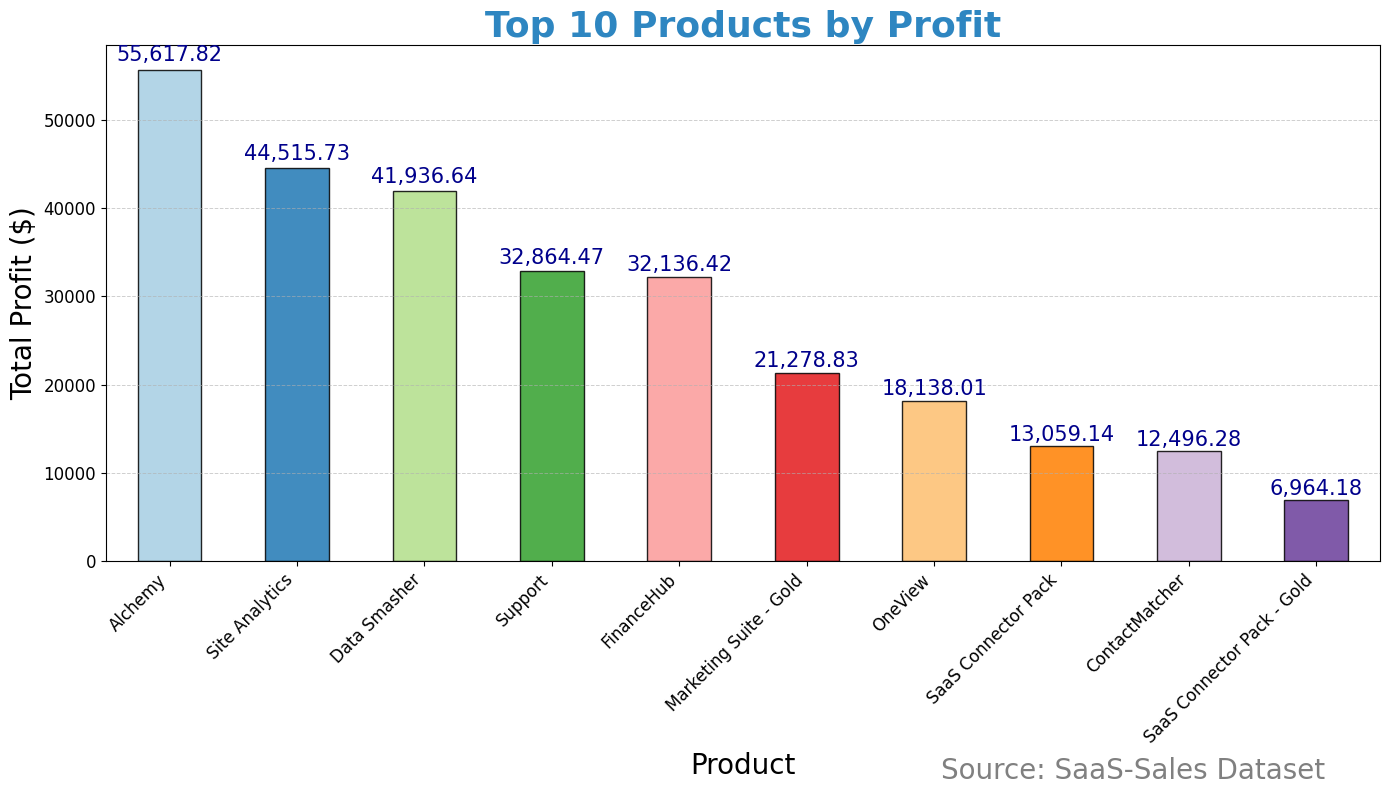

In [47]:
# Aggregate profit by product
product_profit = df.groupby(
    "Product")["Profit"].sum().sort_values(ascending=False)

# Enhanced Plot for Top 10 Products
fig, ax = plt.subplots(figsize=(14, 8))
bars = product_profit.head(10).plot(
    kind="bar", ax=ax, color=plt.cm.Paired(range(10)), edgecolor="black", alpha=0.85
)

# Add numeric labels to bars
for bar in bars.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + (bar.get_height() * 0.01),  # Slightly above each bar
        f"{bar.get_height():,.2f}",
        ha="center",
        va="bottom",
        fontsize=15,
        color="darkblue",
    )

# Titles and Labels
ax.set_title(
    "Top 10 Products by Profit", fontsize=26, fontweight="bold", color="#2E86C1"
)
ax.set_ylabel("Total Profit ($)", fontsize=20)
ax.set_xlabel("Product", fontsize=20)

# Customize ticks
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
ax.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)

# Add a source note
plt.figtext(
    0.95,
    0.02,
    "Source: SaaS-Sales Dataset",
    horizontalalignment="right",
    fontsize=20,
    color="gray",
)

plt.tight_layout()
plt.savefig('bar top 10 products by profit.jpg', format='jpg', dpi=300)
plt.show()

### **Insights from the Visualization**:

- **Top Product**: The **Alchemy** product dominates profitability, contributing a profit of **55,617**, significantly outperforming all other products.
- **Other Key Products**:
  - **Site Analytics** and **Data Smasher** are also major contributors to profit.
  - Products such as **Support** and **Fiance Hub** show moderate profitability.
- **Lower Contributors**: The products at the lower end of the top 10, such as **Contact Matcher** and **SaaS Connector Pack - Gold**, contribute less than **2,500** in profit.

### **Key Takeaways**:

- The Alchemy product is a clear standout and should be prioritized in terms of marketing, sales efforts, and resource allocation.
- Moderate and low-contributing products may require further analysis to determine whether their performance can be improved or if resources should be redirected to higher-performing products.

### **Next Step**:

Analyze the profitability of the **Alchemy** product by customer segment to understand which segments drive its exceptional performance.

---


### **Profit by Customer Segment for the Support Product**

Analyzing profit by customer segment for the **Support** product helps identify the most profitable segments and provides insights for more effective marketing strategies.

### **Analysis Steps**:

1. **Filter Data**:
   - Extracted data specific to the **Support** product.
2. **Aggregation**:
   - Grouped data by **customer segment** and calculated the total profit for each segment.
3. **Visualization**:
   - Created a bar chart to illustrate the profit distribution across customer segments.


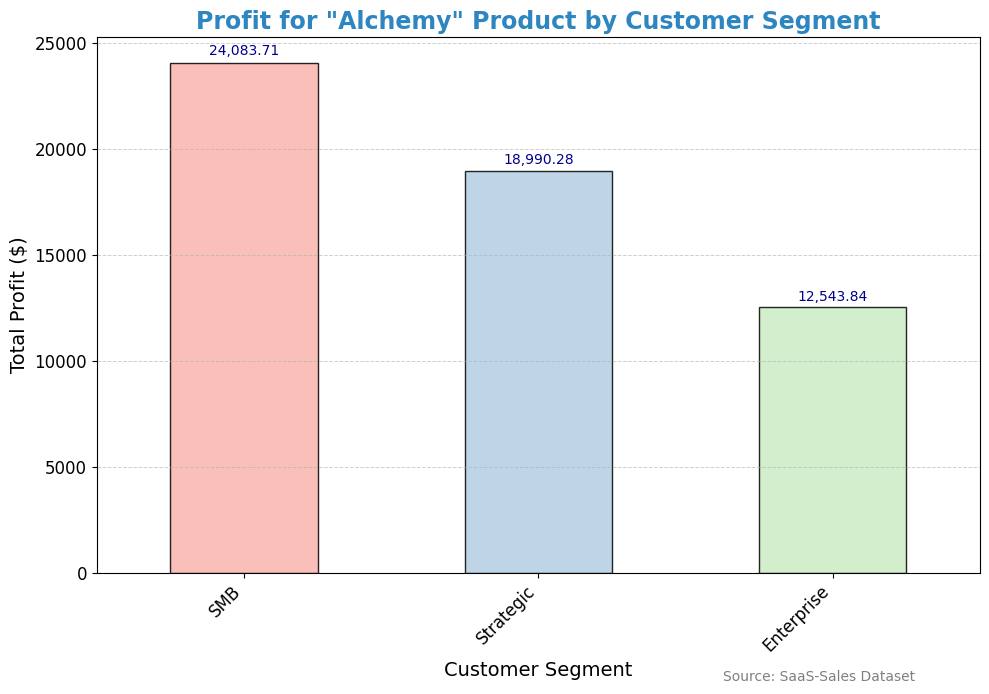

In [48]:
# Filter data for the 'Alchemy' product
alchemy_data = df[df["Product"] == "Alchemy"]

# Aggregate profit by customer segment
segment_profit = (
    alchemy_data.groupby("Segment")["Profit"].sum().sort_values(ascending=False)
)

# Enhanced Plot
fig, ax = plt.subplots(figsize=(10, 7))
# Use a professional color palette
colors = plt.cm.Pastel1(range(len(segment_profit)))
segment_profit.plot(kind="bar", color=colors, edgecolor="black", alpha=0.85, ax=ax)

# Add value annotations
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + (bar.get_height() * 0.01),  # Slightly above the bar
        f"{bar.get_height():,.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="darkblue",
    )

# Titles and Labels
ax.set_title(
    'Profit for "Alchemy" Product by Customer Segment',
    fontsize=17,
    fontweight="bold",
    color="#2E86C1",
)
ax.set_ylabel("Total Profit ($)", fontsize=14)
ax.set_xlabel("Customer Segment", fontsize=14)

# Customize x-ticks
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for readability
ax.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)

# Add a source note
plt.figtext(
    0.92,
    0.02,
    "Source: SaaS-Sales Dataset",
    horizontalalignment="right",
    fontsize=10,
    color="gray",
)

plt.tight_layout()
plt.show()

### **Insights from the Visualization**:

- **SMB (Small and Medium Businesses)**:
  - The SMB segment contributes the highest profit of **24,083**, making it the most profitable segment.
- **Strategic**:
  - The Strategic segment generates a profit of **18,990**, ranking second.
- **Enterprise**:
  - The Enterprise segment contributes the lowest profit of **12,543** compared to the other segments.

### **Conclusions and Recommendations**:

- **SMB** is the primary customer segment for the Alchemy product and should remain a key focus for marketing and sales strategies.
- Further analysis of the **Enterprise** segment is recommended to explore opportunities for increasing profit through tailored offerings or additional promotions.

### **Next Step**:

Conduct a profit distribution analysis by region to understand how the Alchemy product's profitability is distributed geographically.

---


### **Profit Distribution by Region for Alchemy**

Analyzing profit distribution by region for the **Support** product within the **SMB** segment provides insights into regional performance and highlights areas of strength and opportunities for growth.

### **Analysis Steps**:

1. **Filter Data**:
   - Focused on the **Support** product and the **SMB** customer segment.
2. **Aggregation**:
   - Grouped profit data by region and calculated the total profit for each region.
3. **Visualization**:
   - Created a bar chart to display total profit by region.


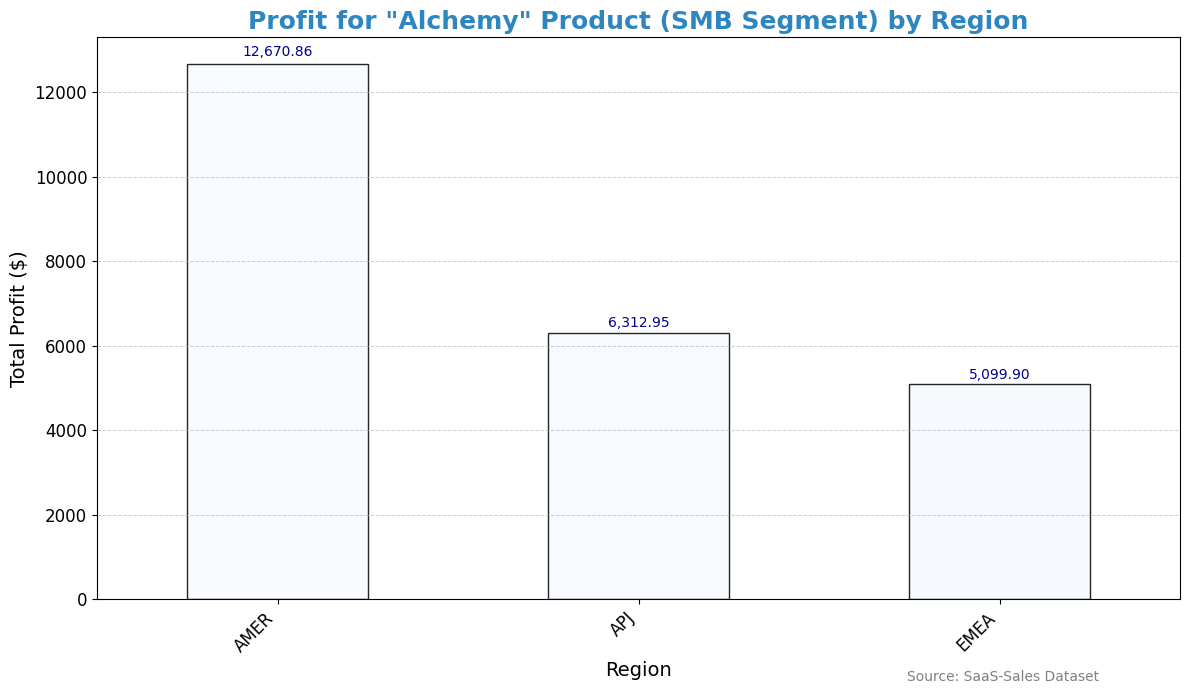

In [49]:
# Filter data for 'Alchemy' product and 'SMB' segment
smb_Alchemy_data = df[(df["Product"] == "Alchemy") & (df["Segment"] == "SMB")]

# Aggregate profit by region
region_profit = (
    smb_Alchemy_data.groupby("Region")["Profit"].sum().sort_values(ascending=False)
)

# Enhanced Plot
fig, ax = plt.subplots(figsize=(12, 7))
colors = plt.cm.Blues(range(len(region_profit)))  # Professional color palette
region_profit.plot(kind="bar", color=colors, edgecolor="black", alpha=0.85, ax=ax)

# Add value annotations
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + (bar.get_height() * 0.01),  # Position slightly above the bar
        f"{bar.get_height():,.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="darkblue",
    )

# Titles and Labels
ax.set_title(
    'Profit for "Alchemy" Product (SMB Segment) by Region',
    fontsize=18,
    fontweight="bold",
    color="#2E86C1",
)
ax.set_ylabel("Total Profit ($)", fontsize=14)
ax.set_xlabel("Region", fontsize=14)

# Customize x-ticks
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
ax.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)

# Add a source note
plt.figtext(
    0.92,
    0.02,
    "Source: SaaS-Sales Dataset",
    horizontalalignment="right",
    fontsize=10,
    color="gray",
)

plt.tight_layout()
plt.show()

### **Insights from the Visualization**:

- **EMEA**:
  - The EMEA region generates the highest profit of **12,670**, double the amount of AMER.
- **AMER**:
  - The AMER region follows closely with a profit of **6,312**.
- **APJ**:
  - The APJ region lags behind with a profit of **5,099**, indicating potential for improvement.

### **Conclusions and Recommendations**:

- **APJ and AMER**:
  - These regions are performing strongly, suggesting that current strategies are effective and should be maintained.
- **EMEA**:
  - The lower profitability in EMEA indicates a need for targeted strategies, such as localized marketing, pricing adjustments, or customer acquisition efforts.

### **Next Step**:

Analyze profitability across key products in each region (**EMEA, AMER, APJ**) to identify the top-performing products and their regional contributions.

---


### **Comparison of Profit Across Key Products in Each Region**

This analysis compares the profitability of the top-performing products across major regions (**EMEA, AMER, APJ**) to identify regional product trends and contributions.

### **Analysis Steps**:

1. **Aggregation**:
   - Grouped data by **Region** and **Product** to calculate total profit.
   - Filtered for the top 5 products based on overall profit.
2. **Visualization**:
   - Created a stacked bar chart to illustrate the contribution of each product to the total profit in each region.


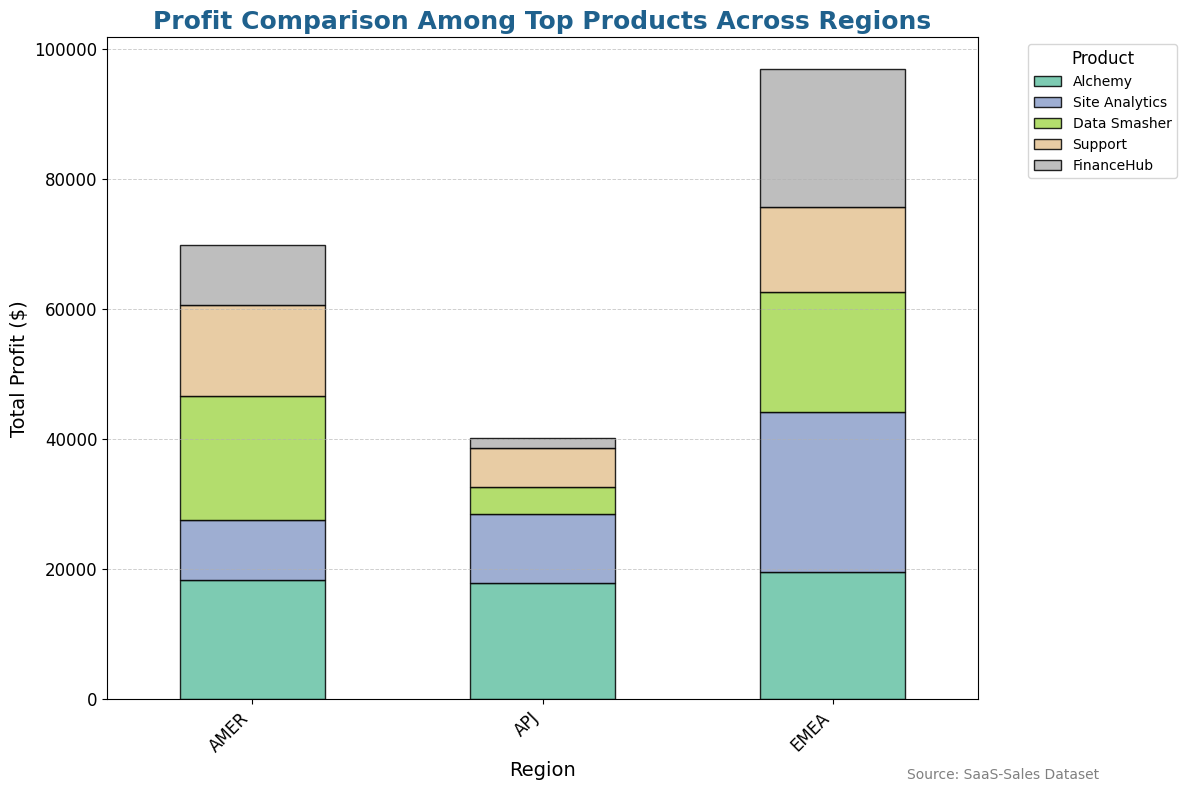

In [50]:
# Aggregate profit by product and region
product_region_profit = (
    df.groupby(["Region", "Product"])["Profit"].sum().unstack().fillna(0)
)

# Select the top 5 products based on total profit
top_products = df.groupby("Product")["Profit"].sum().nlargest(5).index
product_region_profit = product_region_profit[top_products]

# Enhanced Plot
fig, ax = plt.subplots(figsize=(12, 8))
product_region_profit.plot(
    kind="bar", stacked=True, ax=ax, colormap="Set2", edgecolor="black", alpha=0.85
)

# Add titles and labels
ax.set_title(
    "Profit Comparison Among Top Products Across Regions",
    fontsize=18,
    fontweight="bold",
    color="#1F618D",
)
ax.set_ylabel("Total Profit ($)", fontsize=14)
ax.set_xlabel("Region", fontsize=14)

# Customize x-ticks
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Add legend outside the plot
plt.legend(
    title="Product",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=10,
    title_fontsize=12,
)

# Add gridlines for better readability
ax.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)

# Add a source note
plt.figtext(
    0.92,
    0.02,
    "Source: SaaS-Sales Dataset",
    horizontalalignment="right",
    fontsize=10,
    color="gray",
)

plt.tight_layout()
plt.savefig('baring profit comparison.jpg', format='jpg', dpi=300)
plt.show()

### **Insights**
- **Top-Performing Region**: The **EMEA region** generates the highest profit among all regions, showcasing strong product performance and market presence.
- **Moderate Performance**: The **AMER region** follows EMEA, contributing a significant but lower profit.
- **Underperforming Region**: The **APJ region** has the lowest total profit, indicating untapped potential or challenges in market engagement.

- **Product Contributions**:
  - **Support**: Consistently the most profitable product across all regions, dominating total profit contributions.
  - **Alchemy** and **FinanceHub**: Show high profitability in the EMEA and AMER regions but contribute less in APJ.
  - **Site Analytics** and **Data Smasher**: Provide moderate contributions across regions but do not dominate any particular region.


### **Takeaways**
1. The **EMEA region** is a critical driver of profitability and should remain a focal point for future investments and marketing efforts.
2. The **APJ region** requires a detailed review of market dynamics and potential strategies to improve performance.
3. **Support** product should continue to receive priority for marketing and development due to its dominance across all regions.


### **Conclusion**
The chart highlights clear regional disparities in profitability, with **EMEA leading, AMER in second, and APJ lagging behind**. Product-wise, **Support** is the standout performer across all regions. 

---

### **B. Analysis of Profitability: Discount vs Profit**

Understanding the relationship between discounts and profit is essential for evaluating pricing strategies and their impact on financial performance.

### **Analysis Steps**:

1. **Visualization**:
   - Created a scatter plot to explore the relationship between discount percentages and profit.


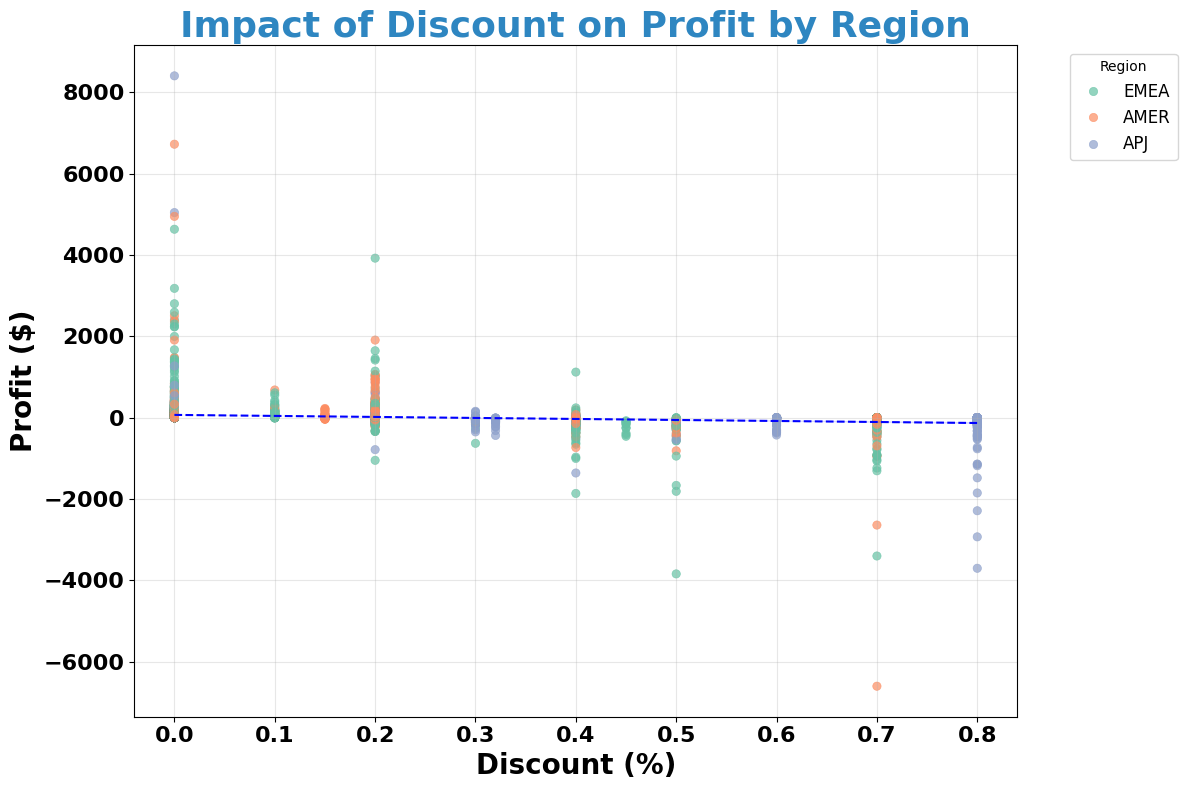

In [51]:
# Enhanced Scatter Plot: Discount vs Profit
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x="Discount",
    y="Profit",
    data=df,
    hue="Region",  # Color points by region to add context
    palette="Set2",
    alpha=0.7,
    edgecolor=None,
)

# Add trendline for better analysis
sns.regplot(
    x="Discount",
    y="Profit",
    data=df,
    scatter=False,
    color="blue",
    line_kws={"linestyle": "--", "linewidth": 1.5},
)

# Titles and Labels
plt.title(
    "Impact of Discount on Profit by Region",
    fontsize=26,
    fontweight="bold",
    color="#2E86C1",
)
plt.xlabel("Discount (%)", fontsize=20, fontweight="bold")
plt.ylabel("Profit ($)", fontsize=20, fontweight="bold")

# Customize ticks for x and y axes
plt.xticks(fontsize=16, fontweight="bold")
plt.yticks(fontsize=16, fontweight="bold")

# Customize legend
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# Grid and layout adjustments
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('scatter discount on prfit.jpg', format='jpg', dpi=300)
plt.show()

### **Insights from the Visualization**:

- **General Trend**:
  - Higher discounts tend to correlate with reduced profits, as shown by the clustering of lower profit values at higher discount levels.
  - Some discounts appear to negatively impact profitability, with a portion of transactions yielding losses.
- **Low Discount Range**:
  - Transactions with low discounts (0%–20%) exhibit a wide range of profitability, including significant positive profits.

### **Key Takeaways**:

- Discounts should be applied strategically, as excessive discounts can erode profitability.
- Further analysis is needed to understand the conditions under which discounts lead to positive profits.

### **Next Step**:

Perform a **Heatmap Analysis** to explore the interaction between discounts, quantities, and profits, providing deeper insights into their combined impact.

---


### **Heatmap: Discount vs Quantity and Profit**

This heatmap visualizes the interaction between discount levels, quantities, and their impact on profit, providing insights into how these variables influence profitability.

### **Analysis Steps**:

1. **Data Preparation**:
   - Converted relevant columns (`Discount`, `Profit`, `Quantity`) to numeric types to ensure consistency.
   - Created a pivot table aggregating average profits for combinations of discount levels and quantities.
2. **Visualization**:
   - Generated a heatmap to illustrate the relationship between discounts, quantities, and their associated profits.


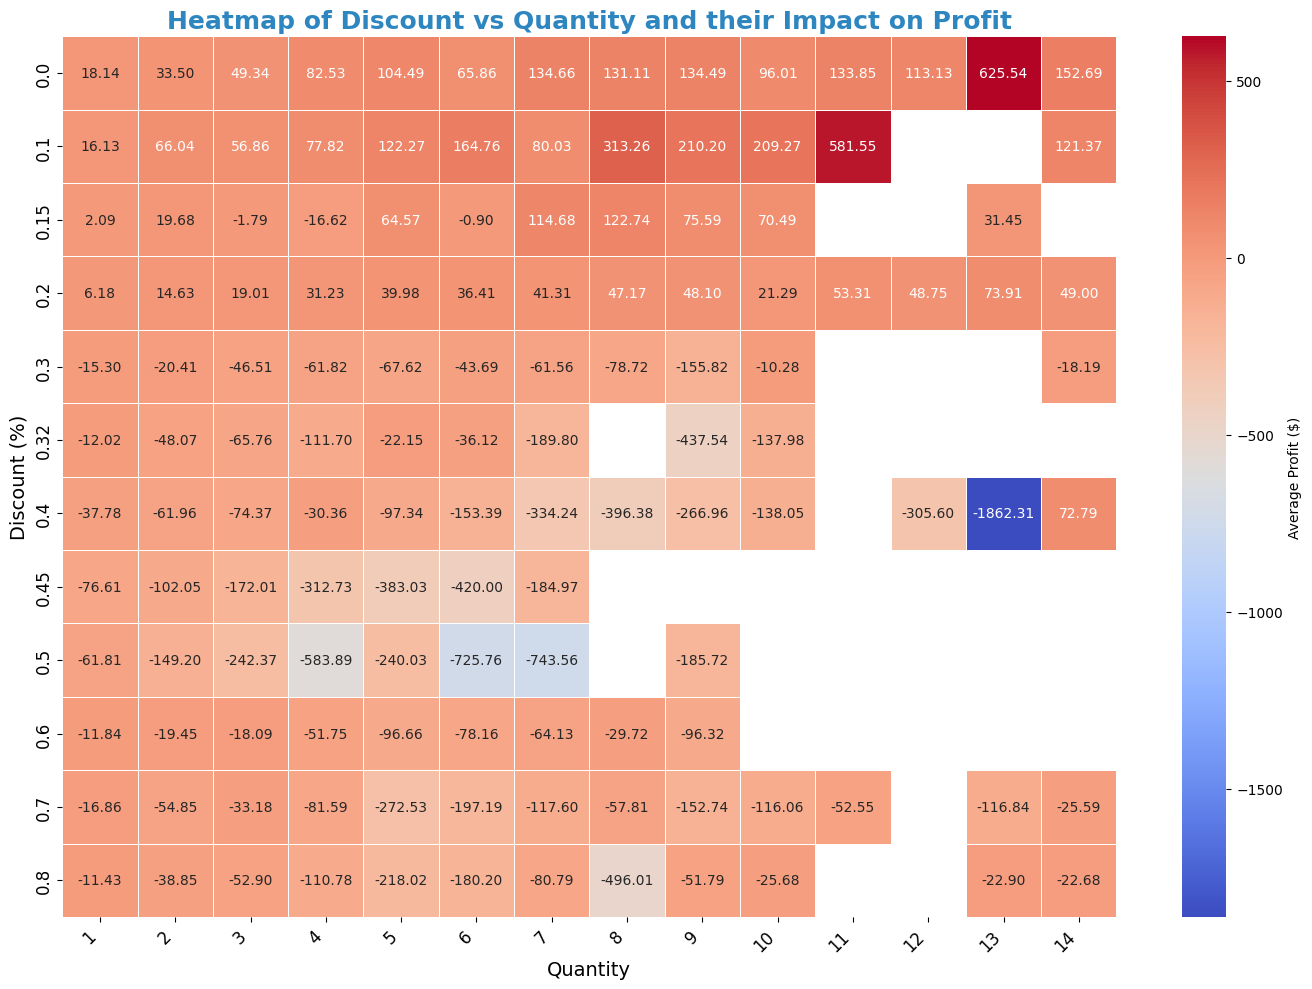

In [52]:
# Convert data types if necessary
df["Discount"] = pd.to_numeric(df["Discount"], errors="coerce")
df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")

# Create pivot table for the heatmap
pivot_table = df.pivot_table(
    index="Discount", columns="Quantity", values="Profit", aggfunc="mean"
)

# Enhanced Heatmap Plot
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(
    pivot_table,
    cmap="coolwarm",  # A diverging color map for better contrast
    annot=True,  # Annotate cells with numerical values
    fmt=".2f",  # Format annotations to 2 decimal places
    linewidths=0.5,  # Add gridlines between cells
    cbar_kws={"label": "Average Profit ($)"},  # Add a label to the color bar
)

# Titles and Labels
plt.title(
    "Heatmap of Discount vs Quantity and their Impact on Profit",
    fontsize=18,
    fontweight="bold",
    color="#2E86C1",
)
plt.xlabel("Quantity", fontsize=14)
plt.ylabel("Discount (%)", fontsize=14)

# Adjust tick labels for readability
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Layout adjustment
plt.tight_layout()
plt.show()

### **Insights from the Heatmap**:

- **Low Discounts (0%–20%)**:
  - Profit tends to increase with higher quantities, particularly at lower discount levels.
- **Higher Discounts (>40%)**:
  - These discounts often result in reduced or negative profits, regardless of quantity sold.
- **Optimal Range**:
  - Discounts in the range of **10%–20%** combined with moderate quantities (5–10 units) appear to yield the highest profits.

### **Key Takeaways**:

- **Strategic Discounting**:
  - Focus on offering moderate discounts (10%–20%) while encouraging higher quantities for optimal profitability.
- **Avoid Excessive Discounts**:
  - Discounts above 40% consistently result in reduced profitability and should be avoided unless justified by specific business goals.

### **Next Step**:

Perform a heatmap analysis of **Discount vs Profit by Industry** to uncover industry-specific discounting trends and their profitability impact.

---


### **Heatmap: Discount vs Profit by Industry**

This heatmap explores how discounts influence profitability across various industries, providing insights into the effectiveness of discounting strategies within specific sectors.

### **Analysis Steps**:

1. **Data Preparation**:
   - Created a pivot table that aggregates average profit for each industry and discount level.
   - Sorted industries by their average profit to improve visualization clarity.
2. **Visualization**:
   - Generated a heatmap to illustrate the relationship between discount levels and profit for each industry.


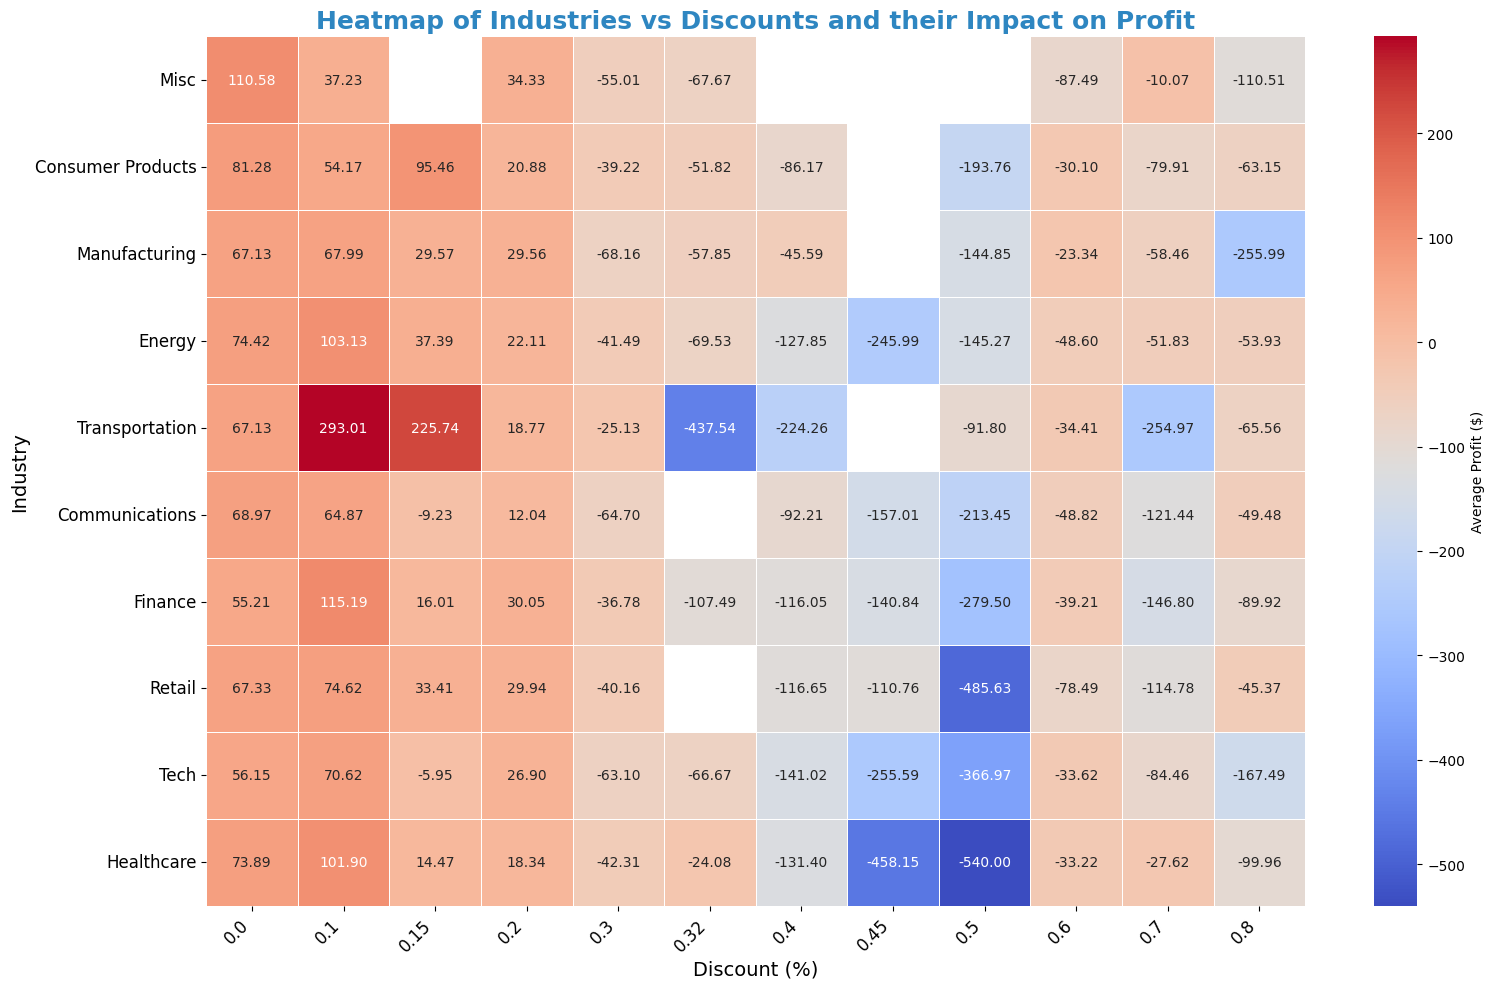

In [53]:
# Create a pivot table to analyze specific industries
industry_pivot_table = df.pivot_table(
    index="Industry", columns="Discount", values="Profit", aggfunc="mean"
)

# Sort the industries by the highest average profit for better visualization
industry_pivot_table["Average"] = industry_pivot_table.mean(
    axis=1
)  # Add a helper column for sorting
industry_pivot_table = industry_pivot_table.sort_values(by="Average", ascending=False)
industry_pivot_table = industry_pivot_table.drop(
    columns="Average"
)  # Remove helper column after sorting

# Enhanced Heatmap Plot
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(
    industry_pivot_table,
    cmap="coolwarm",  # Diverging colormap for better contrast
    annot=True,  # Annotate cells with numerical values
    fmt=".2f",  # Format annotations to 2 decimal places
    linewidths=0.5,  # Add gridlines between cells
    cbar_kws={"label": "Average Profit ($)"},  # Add a label to the color bar
)

# Titles and Labels
plt.title(
    "Heatmap of Industries vs Discounts and their Impact on Profit",
    fontsize=18,
    fontweight="bold",
    color="#2E86C1",
)
plt.xlabel("Discount (%)", fontsize=14)
plt.ylabel("Industry", fontsize=14)

# Adjust tick labels for readability
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Layout adjustment
plt.tight_layout()
plt.show()

### **Insights from the Heatmap**:

- **Energy and Communications**:
  - These industries exhibit strong positive profits at lower discount levels (0%–10%).
- **Healthcare**:
  - Profitability drops significantly even with minimal discounts, suggesting that discounts may not be effective for this sector.
- **Retail and Tech**:
  - Moderate discounts (10%–30%) appear to yield consistent positive profits.
- **Higher Discounts (>40%)**:
  - Most industries show reduced or negative profits at higher discount levels, indicating diminishing returns from excessive discounting.

### **Key Takeaways**:

- **Strategic Discounting**:
  - Focus on lower discount ranges (0%–20%) for industries like Energy and Communications to maximize profitability.
- **Healthcare Considerations**:
  - Investigate alternative strategies for the Healthcare sector, as discounts do not appear to drive profits effectively.
- **Avoid Excessive Discounts**:
  - Across all industries, discounts exceeding 40% consistently result in losses, reinforcing the need for disciplined discounting practices.

### **Next Step**:

Conduct a heatmap analysis of **Profit by Industry and Segment** to explore profitability patterns across industries and customer segments.

---


### **Heatmap: Profit by Industry and Segment**

This heatmap provides a detailed view of profitability segmented by both **Industry** and **Customer Segment**, highlighting performance variations across different industries and customer groups.

### **Analysis Steps**:

1. **Data Preparation**:
   - Created a pivot table aggregating average profit for each combination of **Industry** and **Segment**.
2. **Visualization**:
   - Generated a heatmap to display profitability segmented by industry and customer segment, with annotated average profit values.


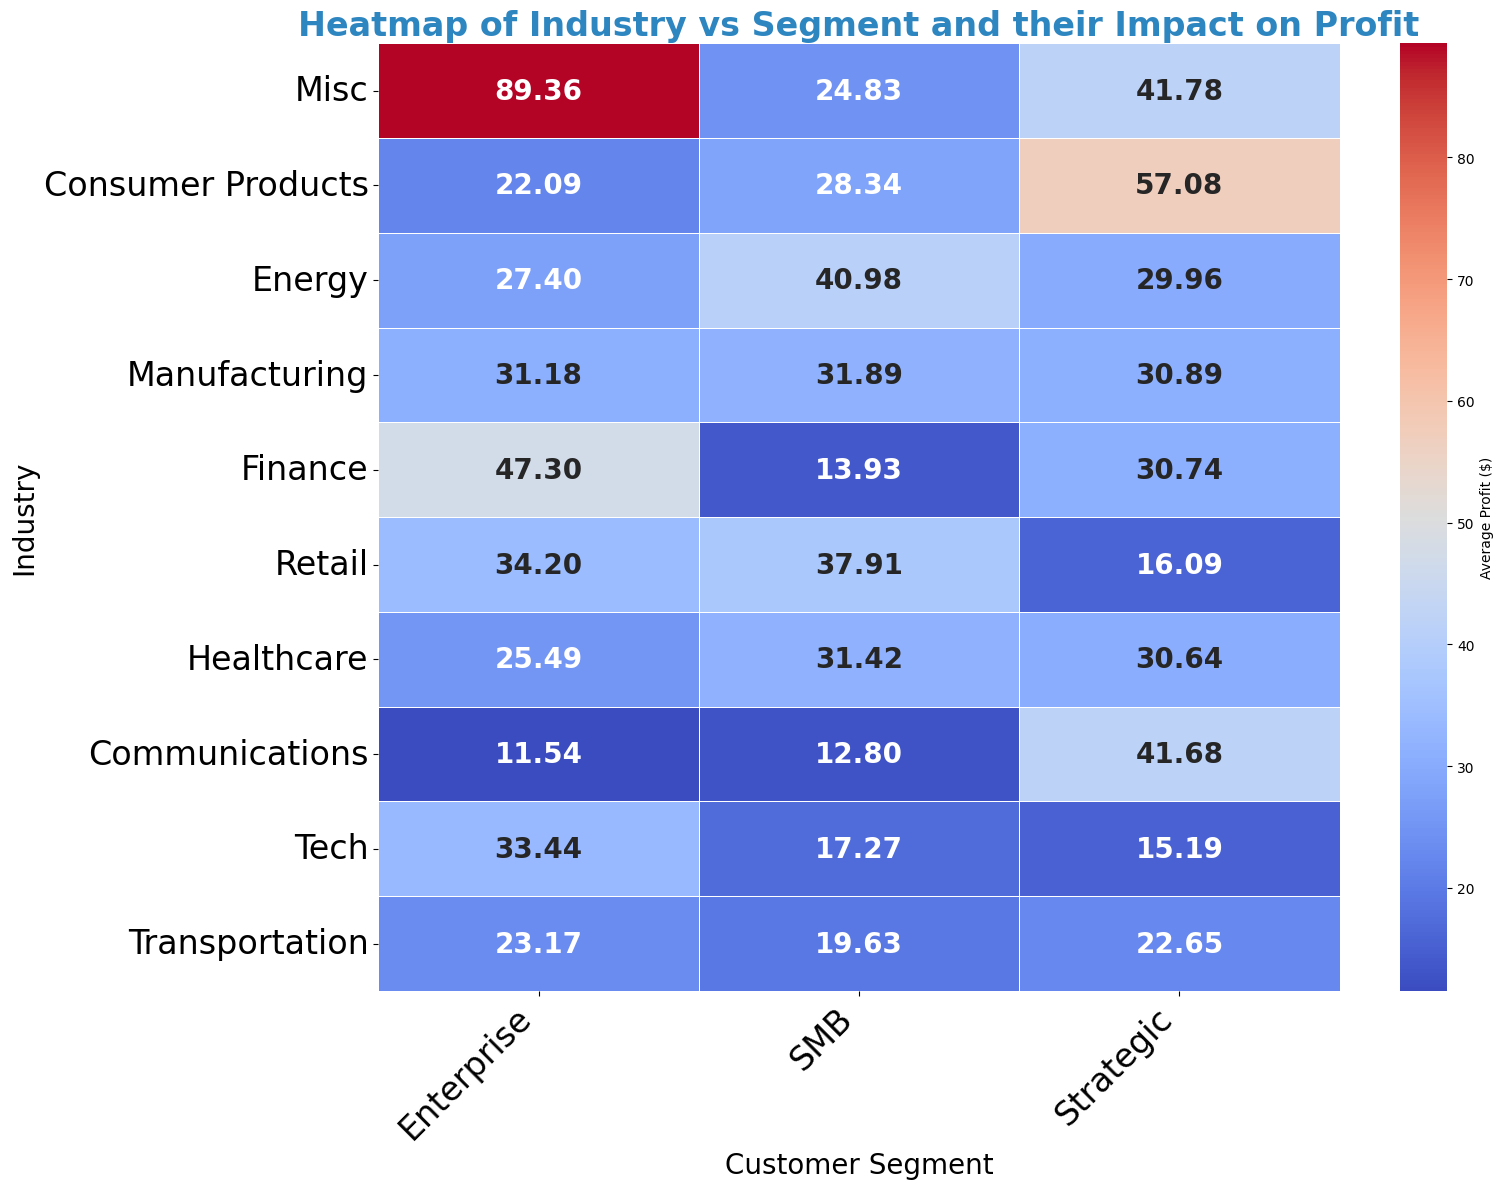

In [54]:
# Pivot table to analyze the impact of discount on profit segmented by both Industry and Segment
segmented_pivot_table = df.pivot_table(
    index="Industry", columns="Segment", values="Profit", aggfunc="mean"
)

# Sort industries by the average profit across all segments
segmented_pivot_table["Average"] = segmented_pivot_table.mean(
    axis=1
)  # Add a helper column for sorting
segmented_pivot_table = segmented_pivot_table.sort_values(by="Average", ascending=False)
segmented_pivot_table = segmented_pivot_table.drop(
    columns="Average"
)  # Remove helper column after sorting

# Enhanced Heatmap Plot
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(
    segmented_pivot_table,
    cmap="coolwarm",  # Diverging color palette for better contrast
    annot=True,  # Annotate cells with average profit values
    fmt=".2f",  # Format annotations to 2 decimal places
    annot_kws={"size": 20, "fontweight": "bold"},
    linewidths=0.5,  # Add gridlines between cells for clarity
    cbar_kws={"label": "Average Profit ($)"},  # Add a label to the color bar
)

# Titles and Labels
plt.title(
    "Heatmap of Industry vs Segment and their Impact on Profit",
    fontsize=24,
    fontweight="bold",
    color="#2E86C1",
)
plt.xlabel("Customer Segment", fontsize=20)
plt.ylabel("Industry", fontsize=20)

# Adjust tick labels for readability
plt.xticks(rotation=45, ha="right", fontsize=24)
plt.yticks(fontsize=24)

# Layout adjustments
plt.tight_layout()
plt.show()

### **Insights from the Heatmap**:

- **Enterprise Segment**:
  - The **Misc** industry performs exceptionally well in the Enterprise segment, with the highest average profit of **10.2**.
  - **Retail** and **Healthcare** industries also exhibit strong profitability in this segment.
- **SMB Segment**:
  - Profitability is more evenly distributed across industries, but the **Misc** industry again stands out with significant contributions.
- **Strategic Segment**:
  - The Strategic segment in the **Misc** industry dominates profitability, achieving an impressive average profit of **16.9**.
  - Other industries, such as **Finance** and **Retail**, also perform well in this segment.

### **Key Takeaways**:

- The **Misc** industry consistently delivers high profitability across all segments, making it a critical area of focus.
- The **Strategic segment** shows the highest potential for maximizing profitability, particularly in industries like Misc and Finance.
- Efforts should be made to further explore underperforming industries and customer segments to uncover opportunities for improvement.

### **Conclusion of Visualization Phase**:

This heatmap concludes the visualization phase by providing actionable insights on industry and segment-specific profitability. These findings can guide strategic decisions regarding pricing, customer targeting, and resource allocation to maximize overall profitability.

---

---


### **Operational Efficiency Analysis - Order Distribution by Segment**

This visualization explores the distribution of orders across customer segments, providing insights into how resources and sales efforts are allocated among different segments.

### **Analysis Steps**:

1. **Data Aggregation**:
   - Calculated the total number of orders for each segment using the `value_counts()` method.
2. **Visualization**:
   - Created a pie chart to represent the percentage distribution of orders among the customer segments.


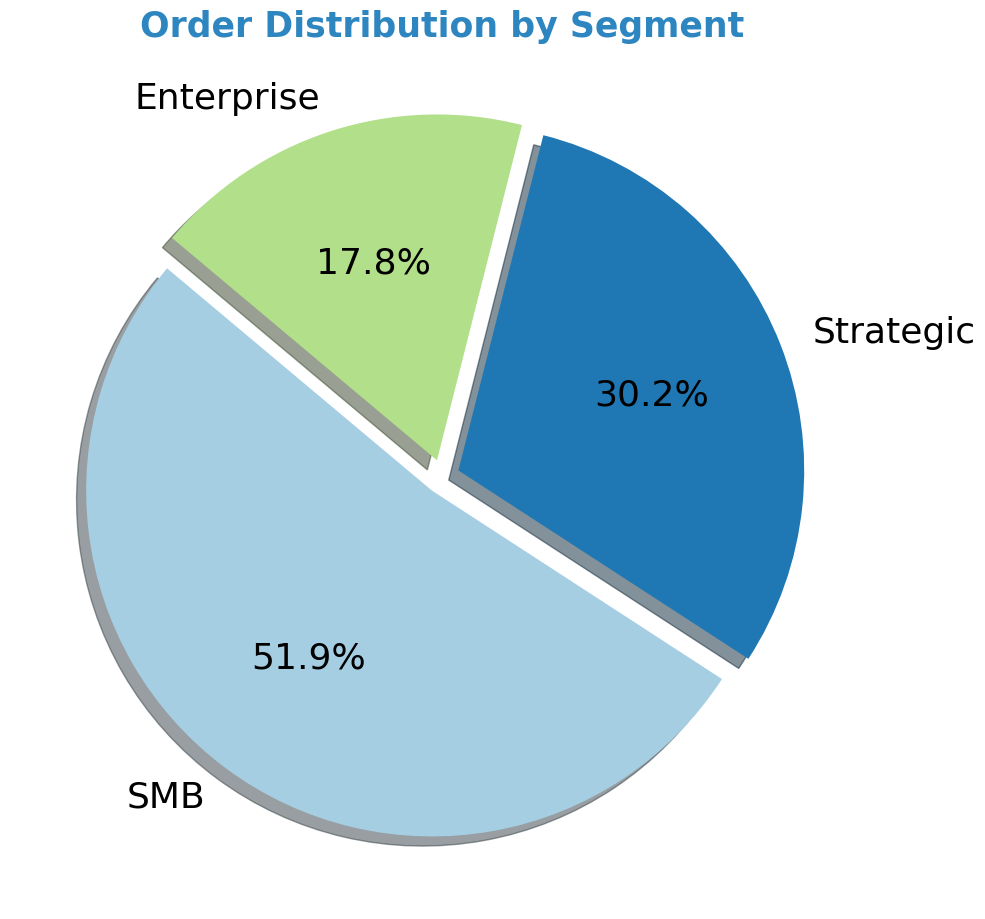

In [55]:
# Calculate order distribution by segment
segment_orders = df["Segment"].value_counts()

# Enhanced Pie Chart
plt.figure(figsize=(10, 10))
# Distinct color palette for clarity
colors = plt.cm.Paired(range(len(segment_orders)))
# Slightly "explode" all segments for emphasis
explode = [0.05] * len(segment_orders)
segment_orders.plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140,
    textprops={"fontsize": 26},
)

# Titles and labels
plt.title(
    "Order Distribution by Segment", fontsize=25, fontweight="bold", color="#2E86C1"
)
plt.ylabel("")  # Remove redundant ylabel
plt.tight_layout()
plt.savefig('PIE Order Distribution by Segment .jpg', format='jpg', dpi=300)
plt.show()

### **Insights from the Visualization**:

- **SMB Segment**:
  - The SMB segment accounts for the majority of orders, with a share of **51.9%**, indicating its dominance in the customer base.
- **Strategic Segment**:
  - The Strategic segment follows with **30.2%** of orders, showcasing its significance.
- **Enterprise Segment**:
  - The Enterprise segment contributes **17.8%** of the total orders, representing a smaller but potentially high-value segment.

### **Key Takeaways**:

- **Resource Allocation**:
  - Given the high proportion of orders from the SMB segment, this segment likely requires the most attention in terms of operational resources and customer support.
- **Strategic Opportunities**:
  - The Strategic segment, while smaller, still represents a significant portion of the orders and might benefit from targeted strategies to increase its share.

### **Next Step**:

Analyze the **Total Profit by Segment** to understand the profitability dynamics and determine if the order distribution aligns with segment profitability.

---


### **Total Profit by Segment**

This analysis evaluates the total profitability of each customer segment to understand how each segment contributes to overall financial performance.

### **Analysis Steps**:

1. **Data Aggregation**:
   - Grouped the data by customer segment and calculated the total profit for each segment.
2. **Visualization**:
   - Created a bar chart to represent the total profit contributed by each segment.


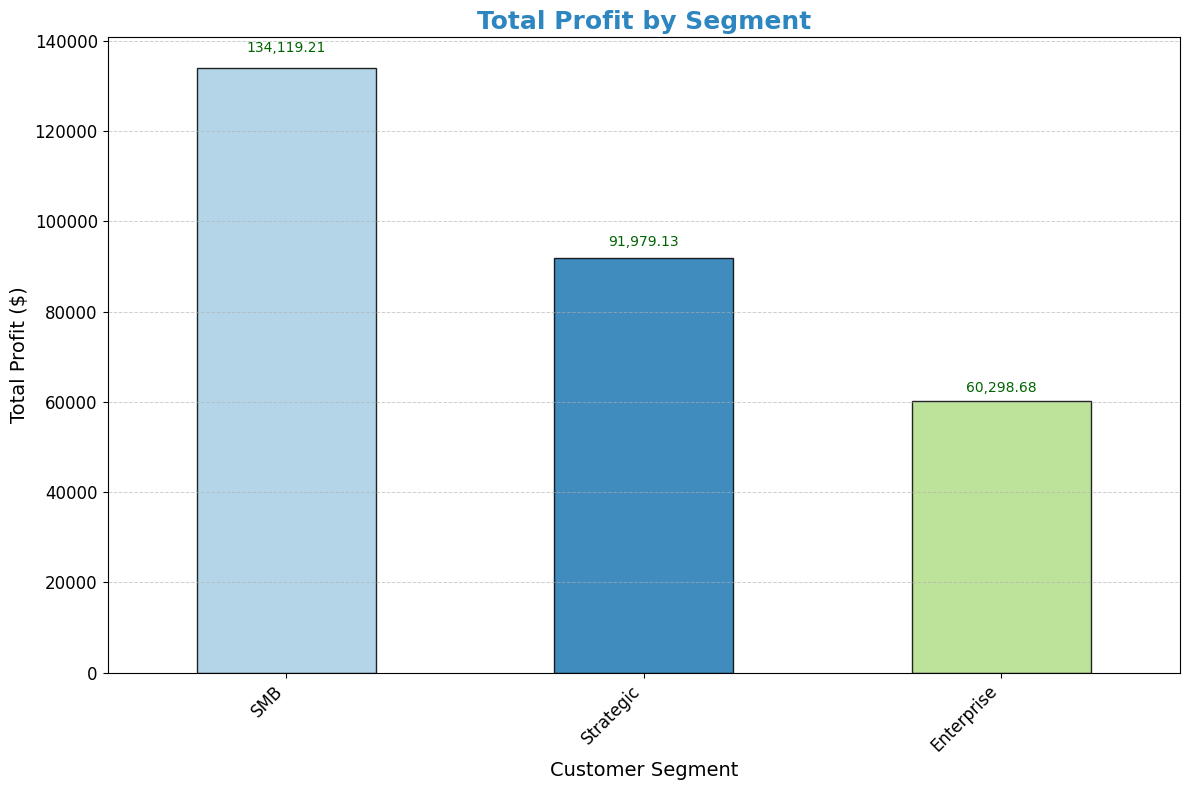

In [56]:
# Group by Segment and calculate total profit
profit_by_segment = df.groupby("Segment")["Profit"].sum().sort_values(ascending=False)

# Enhanced Bar Chart
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired(range(len(profit_by_segment)))  # Use a vibrant color palette
profit_by_segment.plot(kind="bar", color=colors, edgecolor="black", alpha=0.85)

# Titles and Labels
plt.title("Total Profit by Segment", fontsize=18, fontweight="bold", color="#2E86C1")
plt.xlabel("Customer Segment", fontsize=14)
plt.ylabel("Total Profit ($)", fontsize=14)

# Customize x-ticks
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)

# Annotate bars with profit values
for index, value in enumerate(profit_by_segment):
    plt.text(
        index,
        value + value * 0.02,
        f"{value:,.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="darkgreen",
    )

# Layout adjustments
plt.tight_layout()
plt.show()

### **Insights from the Visualization**:

- **SMB Segment**:
  - The SMB segment is the most profitable, contributing over **134,119** in total profit, reflecting its dominance in both order volume and profitability.
- **Strategic Segment**:
  - The Strategic segment ranks second with approximately **91,979** in total profit, showcasing its significant financial impact despite having fewer orders than SMB.
- **Enterprise Segment**:
  - The Enterprise segment, while having the smallest share of orders, contributes around **60,298** in profit, indicating potential for higher margins.

### **Key Takeaways**:

- **SMB** is a critical driver of profitability and should remain a focus for tailored strategies and resource allocation.
- The **Strategic** segment's substantial profit contribution suggests opportunities for expansion and deeper engagement.
- Further investigation into the **Enterprise** segment may reveal ways to enhance its profitability through specialized offerings or improved customer targeting.

### **Next Step**:

Analyze the relationship between **Discounts and Profit by Segment** to uncover segment-specific pricing dynamics and their impact on profitability.

---


### **Relationship Between Discount and Profit by Segment**

This analysis explores the relationship between discounts and profit, segmented by customer groups, to understand how each segment reacts to discount strategies.

### **Analysis Steps**:

1. **Data Filtering**:
   - Removed rows with zero profit values to focus on meaningful data.
2. **Visualization**:
   - Created a scatter plot with **Discount** on the x-axis, **Profit** on the y-axis, and segmented the data by customer segment.


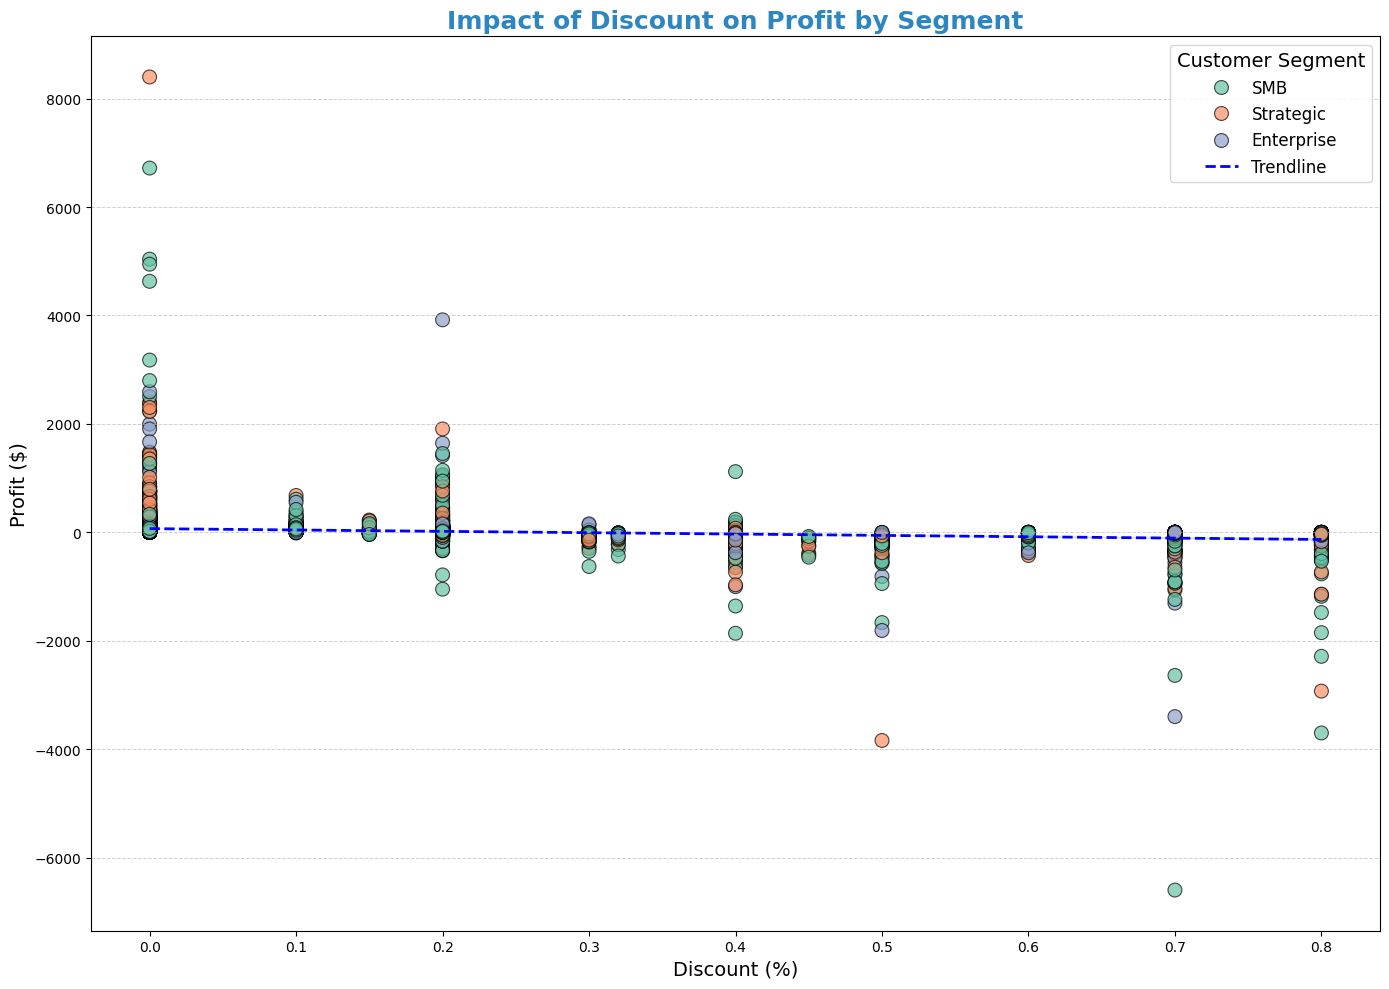

In [57]:
# Filter data to avoid zero profit values and focus on meaningful data
filtered_df = df[df["Profit"] != 0]

# Enhanced Scatter Plot: Discount vs Profit by Segment
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(
    data=filtered_df,
    x="Discount",
    y="Profit",
    hue="Segment",
    alpha=0.7,
    s=100,  # Larger marker size for better visibility
    palette="Set2",
    edgecolor="black",
)

# Add a trendline for better analysis
sns.regplot(
    data=filtered_df,
    x="Discount",
    y="Profit",
    scatter=False,
    color="blue",
    line_kws={"linestyle": "--", "linewidth": 2},
    label="Trendline",
)

# Titles and Labels
plt.title(
    "Impact of Discount on Profit by Segment",
    fontsize=18,
    fontweight="bold",
    color="#2E86C1",
)
plt.xlabel("Discount (%)", fontsize=14)
plt.ylabel("Profit ($)", fontsize=14)

# Customize Legend
plt.legend(
    title="Customer Segment",
    fontsize=12,
    title_fontsize=14,
    loc="upper right",
    frameon=True,
)

# Customize Gridlines
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)

# Improve Layout
plt.tight_layout()

# Show the plot
plt.show()

### **Insights from the Visualization**:

- **General Trends**:
  - All segments experience declining profits as discount levels increase, particularly beyond the **30% discount** range.
  - Discounts between **0%–20%** are associated with higher and more stable profits across segments.
- **Segment-Specific Observations**:
  - The **SMB segment** has the most dispersed profit values, indicating greater variability in how discounts affect profitability.
  - The **Enterprise segment** shows lower overall profits but appears less impacted by discounts in the **10%–20% range**.
  - The **Strategic segment** displays moderate profits but exhibits sharp declines with discounts above **30%**.

### **Key Takeaways**:

- Discounts exceeding **30%** consistently reduce profitability across all segments and should be avoided unless necessary.
- Tailored discount strategies are needed:
  - For **SMB**, focus on optimizing the range of **10%–20%** to maximize profit.
  - For **Enterprise**, explore promotions that maintain discounts below **20%**.
  - For **Strategic**, limit discounts to below **30%** while encouraging higher order quantities.

### **Next Step**:

Analyze the **Average Profit by Discount Level in Each Segment** to quantify and visualize the profitability trends more concretely.

---


### **Average Profit by Discount Level for Each Segment**

This analysis examines the average profit trends across different discount levels for each customer segment to understand the impact of pricing strategies on profitability.

### **Analysis Steps**:
1. **Data Aggregation**:
   - Grouped data by **Segment** and **Discount** to calculate the average profit for each combination.
2. **Visualization**:
   - Created a line plot with **Discount** levels on the x-axis, **Average Profit** on the y-axis, and segmented by customer group.

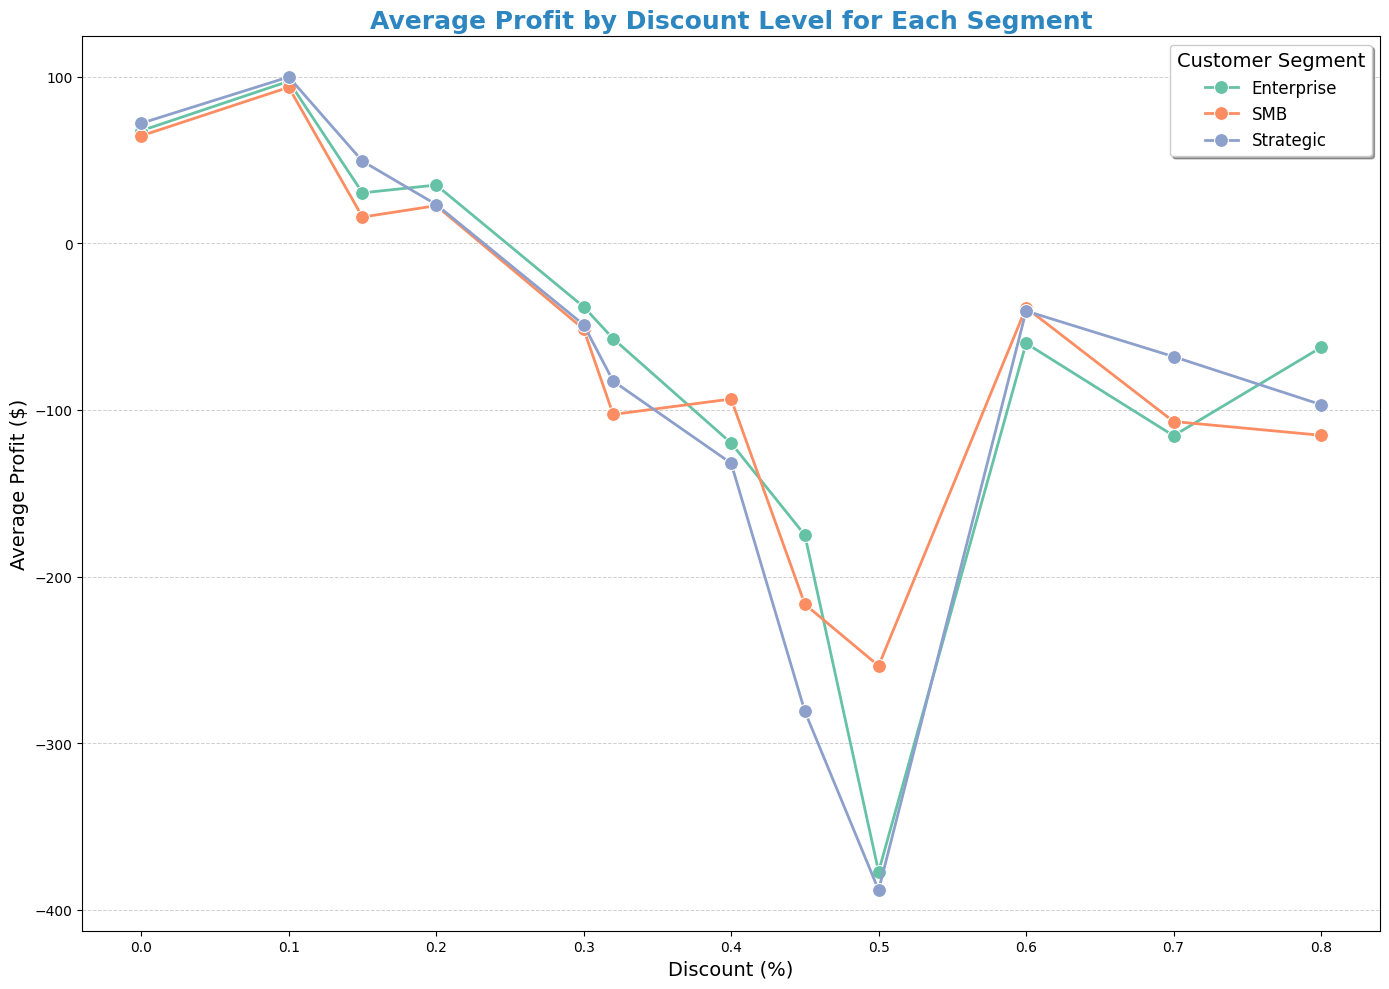

In [58]:
# Filter data to exclude zero profit values
filtered_df = df[df["Profit"] != 0]

# Calculate average profit per discount level for each segment
avg_profit_by_discount = (
    filtered_df.groupby(["Segment", "Discount"])["Profit"].mean().reset_index()
)

# Enhanced Line Plot for CEO Presentation
plt.figure(figsize=(14, 10))
sns.lineplot(
    data=avg_profit_by_discount,
    x="Discount",
    y="Profit",
    hue="Segment",
    marker="o",
    palette="Set2",
    linewidth=2,
    markersize=10,
)

# Titles and Labels
plt.title(
    "Average Profit by Discount Level for Each Segment",
    fontsize=18,
    fontweight="bold",
    color="#2E86C1",
)
plt.xlabel("Discount (%)", fontsize=14)
plt.ylabel("Average Profit ($)", fontsize=14)

# Customize Legend
plt.legend(
    title="Customer Segment",
    title_fontsize=14,
    fontsize=12,
    loc="upper right",
    frameon=True,
    shadow=True,
)

# Add Gridlines
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)

# Layout Adjustment
plt.tight_layout()

plt.savefig('average pofit by discount level.jpg', format='jpg', dpi=300)

# Show the Plot
plt.show()


### **Insights from the Visualization**:
- **Low Discounts (0%–10%)**:
  - All segments exhibit high profitability, with the **Enterprise segment** showing the highest average profit in this range.
- **Discount Range (10%–30%)**:
  - Profitability declines steeply, particularly for the **SMB segment**, which reaches negative average profits at higher discount levels within this range.
- **Higher Discounts (>30%)**:
  - Profits for all segments stabilize at a negative or near-zero level, highlighting the detrimental impact of excessive discounts.
- **Segment-Specific Observations**:
  - The **Enterprise segment** maintains better average profit stability across a wider discount range compared to **SMB** and **Strategic** segments.

### **Key Takeaways**:
- Discounts exceeding **30%** should be avoided as they lead to consistent profitability losses across all segments.
- For optimal profitability:
  - **SMB** and **Strategic** segments perform best with discounts below **20%**.
  - **Enterprise** can sustain profitability slightly beyond **20%**, but caution is still needed.
- Tailored discount strategies for each segment can maximize overall profitability while avoiding steep declines.

### **Conclusion of Visualization Phase**:
This final analysis concludes the visualization phase by providing actionable insights into segment-specific discounting strategies. The findings can guide more effective pricing and sales strategies to enhance profitability across all customer segments.


---

# Comprehensive Analysis Report: AWS SaaS Sales Dataset

## **Overview**
This analysis focuses on key aspects of the AWS SaaS Sales dataset, addressing **sales performance**, **profitability**, and **operational efficiency**. The insights and recommendations derived from this study aim to inform strategic decisions, optimize resources, and drive sustainable growth.

---



## **Key Insights**

### **1. Sales Performance**
- **Seasonal Patterns & Trends**: Identified potential seasonal trends and growth patterns to help the company prepare for peak sales periods and align marketing efforts.
- **Regional Distribution**: Analyzed sales by country, region, and city to uncover key markets driving revenue and identify underperforming areas for improvement.
- **Customer Segments**: Determined which customer segments (e.g., SMB, Enterprise) contribute the most to sales, enabling better-targeted strategies.

### **2. Profitability**
- **Product Profitability**: Highlighted the products and customer segments that deliver the highest profit margins, helping focus on high-value areas.
- **Discount Analysis**: Examined the relationship between discount rates and profitability to understand the impact of discounts on revenue and margins.

### **3. Operational Efficiency**
- **Segment Distribution**: Analyzed order volumes across customer segments (e.g., SMB, Strategic, Enterprise) to identify resource allocation needs.
- **Industry Insights**: Identified industries contributing the least to sales, presenting opportunities for re-engagement or alternative market focus.
- **Order Fulfillment**: Examined order quantities and timelines to address operational inefficiencies and improve fulfillment processes.

---

## **Actionable Recommendations**

1. **Prioritize High-Performing Regions**:
   - Invest marketing resources in regions with the highest revenue and profit contributions.
   - Develop strategies to address underperforming areas.

2. **Optimize Product Portfolio**:
   - Focus product development and marketing efforts on high-profit products and customer segments.
   - Phase out low-performing offerings or redesign them for better market fit.

3. **Refine Discount Strategies**:
   - Implement strategic discounting to ensure profitability while driving sales.
   - Monitor and adjust discount policies based on data-driven insights.

4. **Streamline Operations**:
   - Address bottlenecks in order processing and fulfillment, particularly for high-volume but low-profit segments.
   - Automate processes where feasible to improve efficiency.

5. **Expand Industry Reach**:
   - Target new industries or re-engage underperforming ones with specialized campaigns and messaging.
   - Leverage industry-specific insights to drive growth.

---

## **Business Impact**
By implementing these insights and recommendations, the SaaS company can achieve:
- Enhanced sales performance through targeted strategies.
- Increased profitability by focusing on high-value products and segments.
- Improved operational efficiency, reducing costs and better serving customers.

This analysis provides a data-driven foundation for making informed decisions that strengthen market position and drive sustainable growth.

---

## **Deliverables**
- **Analysis Notebook**: Comprehensive Python analysis (Jupyter Notebook) detailing data cleaning, visualizations, and statistical insights.
- **Interactive Dashboard**: Tableau dashboard for easy exploration of key metrics and trends.
- **Presentation Slides**: Summary of analysis, insights, and recommendations for stakeholder communication.

---
